## Goal

In this Glass classification dataset, I want to build a model to classify the glasses

## Setup

In [8]:
### load required packages
import pandas as pd 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
### laod the dataset and get an overview
df = pd.read_csv(r'D:\Dataset\Side_project_Glass_classification\glass.csv')
print(df.info())
print()

# the distribution of categories and visualization
print(df['Type'].value_counts().sort_values(ascending=False)) # six categories 
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64



               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe  
count  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009  
std      1.423153    0.497219    0.097439  
min      5.430000    0.000000    0.000000  
25%      8.240000    0.000000    0.000000  
50%   

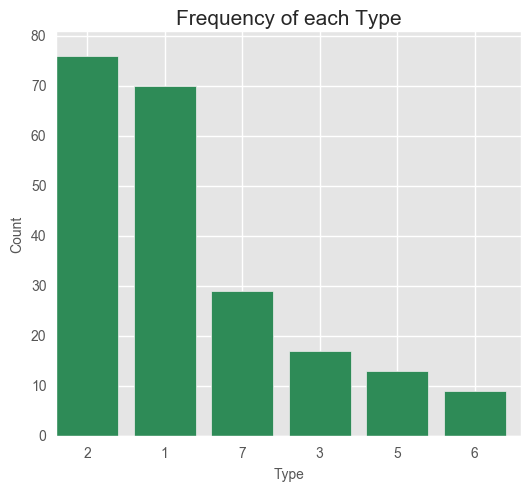

In [7]:
### Visualize the target variable
type_name_li = df['Type'].value_counts().sort_values(ascending=False).index
type_value_li = df['Type'].value_counts().sort_values(ascending=False).values

import matplotlib 
matplotlib.style.use('ggplot')
fig, axes = plt.subplots(figsize=[6, 6])
axes.bar(list(range(len(type_name_li))), type_value_li, color='#2E8b57', width=0.8)
axes.tick_params(labelsize=10)
axes.set_xticks(np.arange(len(type_name_li))+0.4)
axes.set_xticklabels(type_name_li, fontsize=10)
axes.set_xlabel('Type', fontsize=10)
axes.set_ylabel('Count', fontsize=10)
axes.set_ylim(0, np.max(type_value_li)+5)
axes.set_title('Frequency of each Type', fontsize=15, loc='center')
plt.subplots_adjust(top=0.8)

# the distribution of features 
print(df.ix[:, df.columns[:-1]].describe())

## EDA

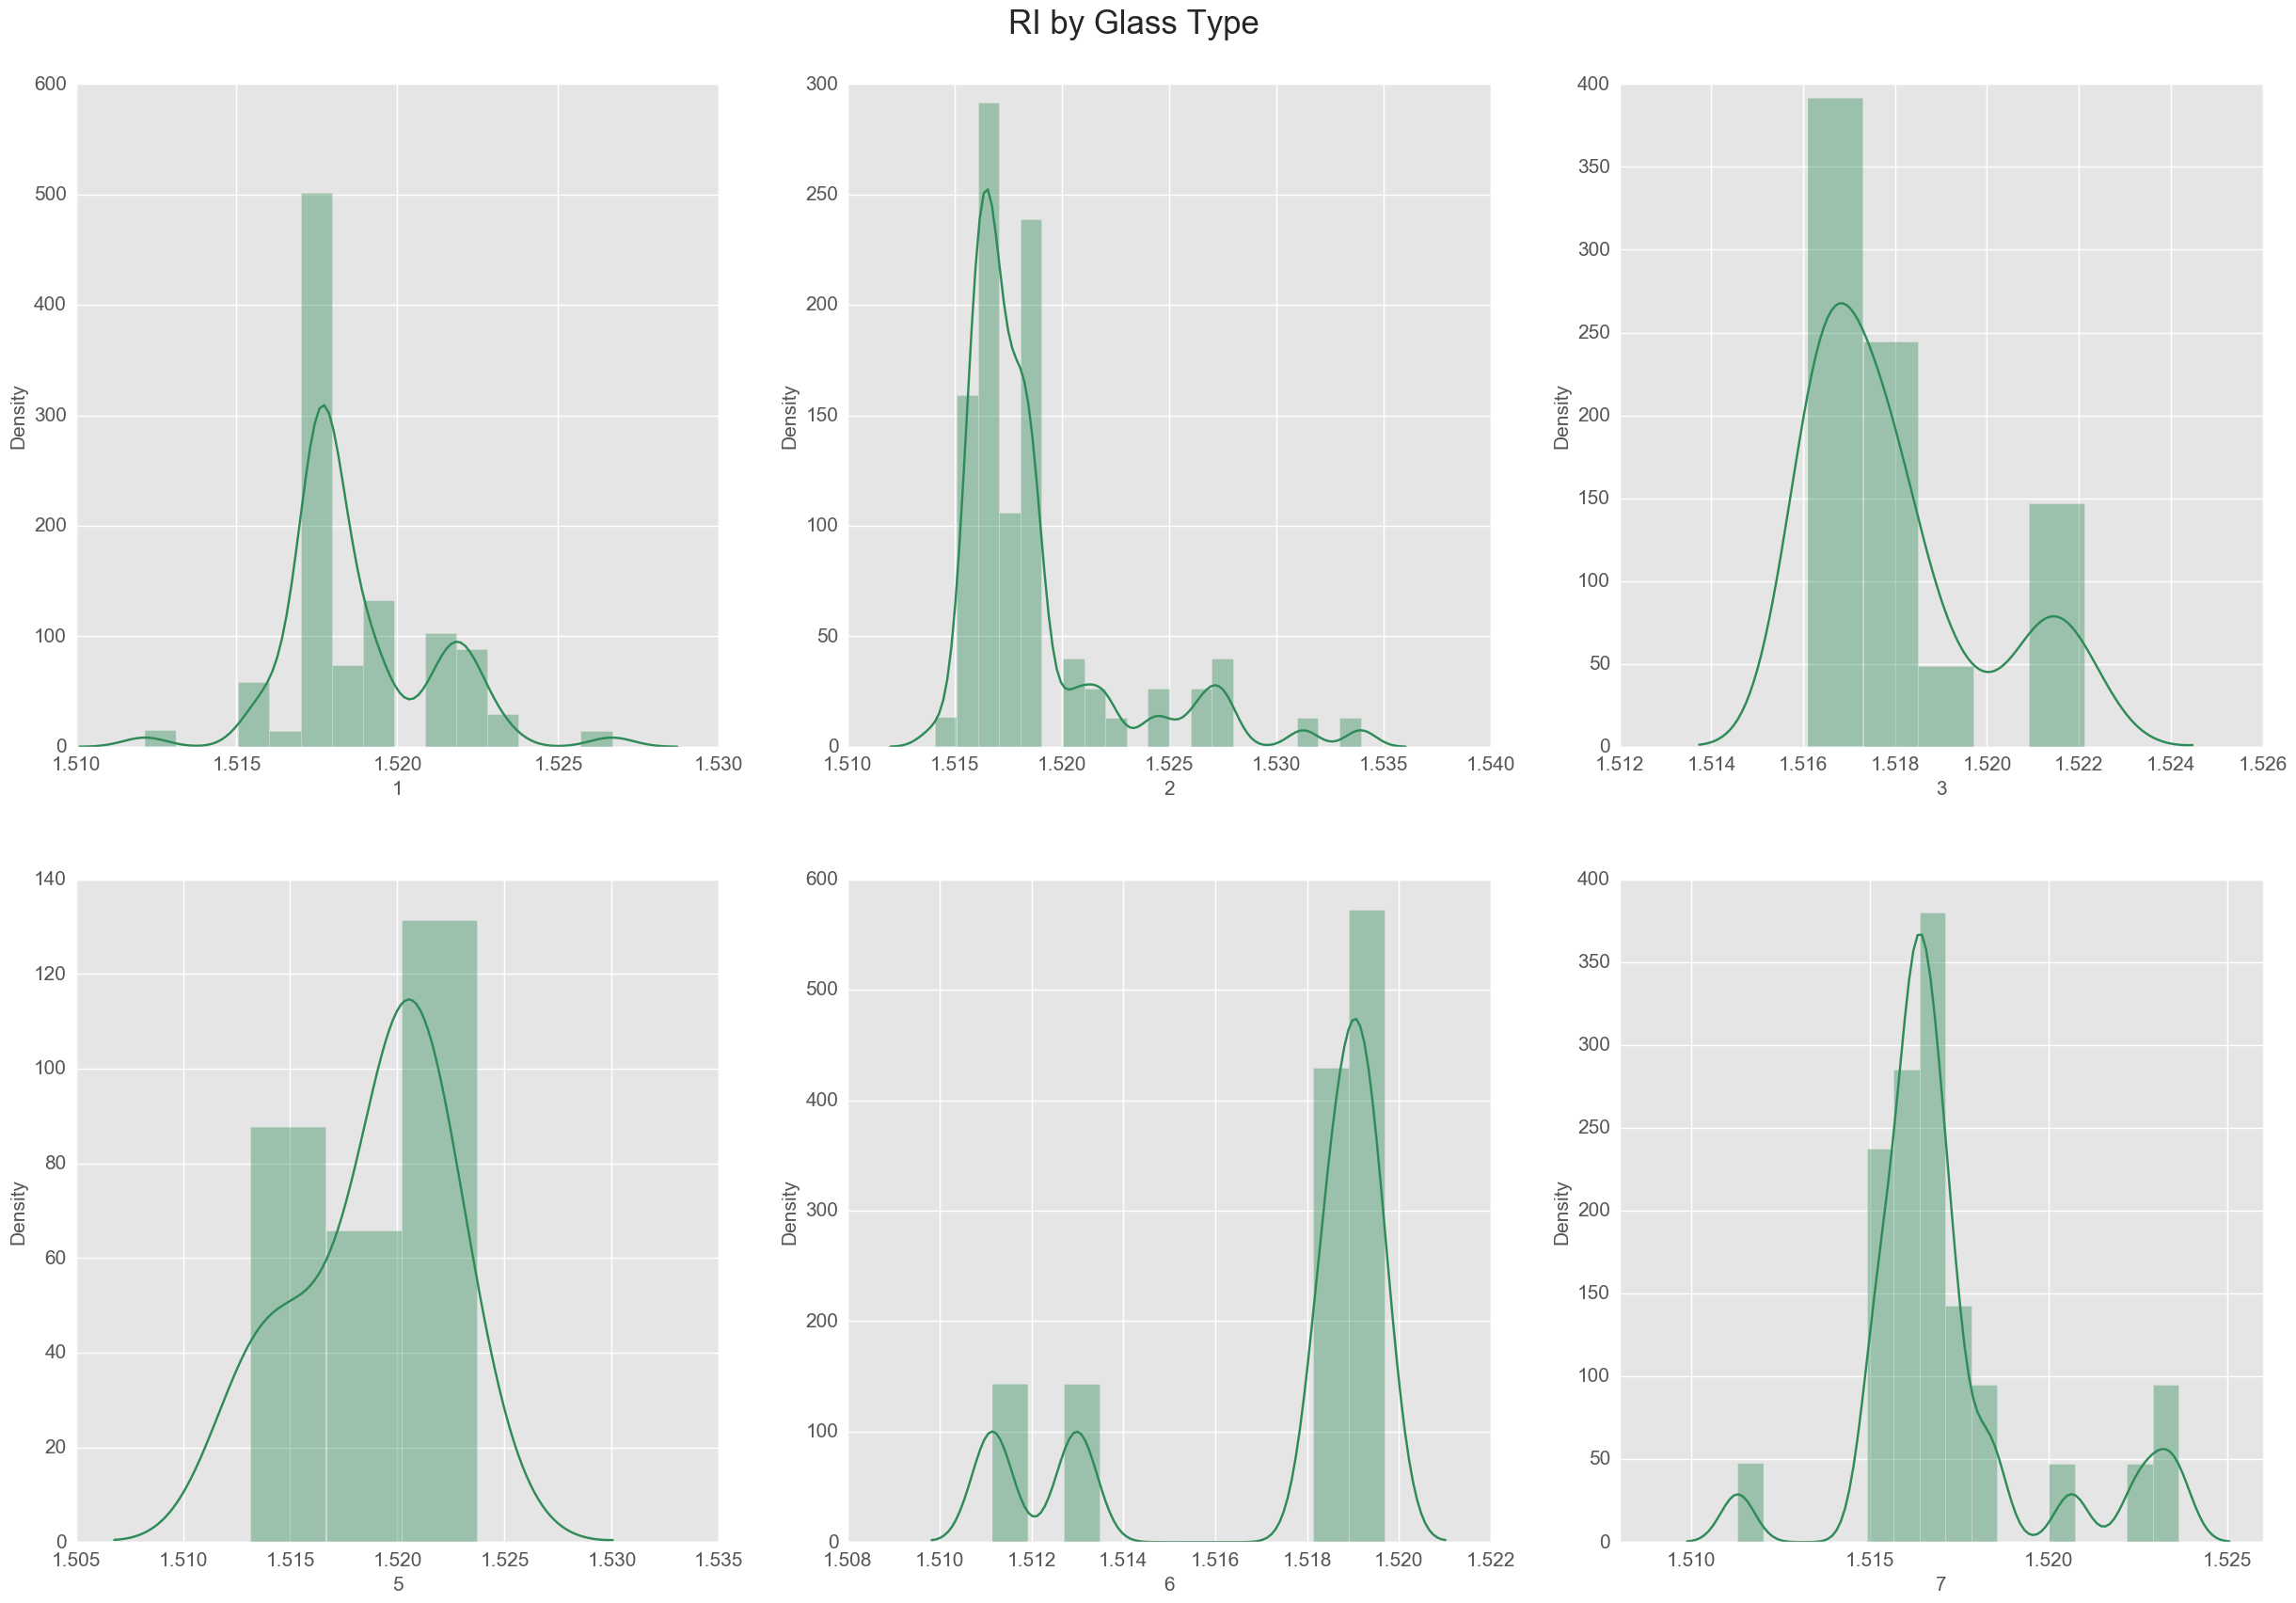

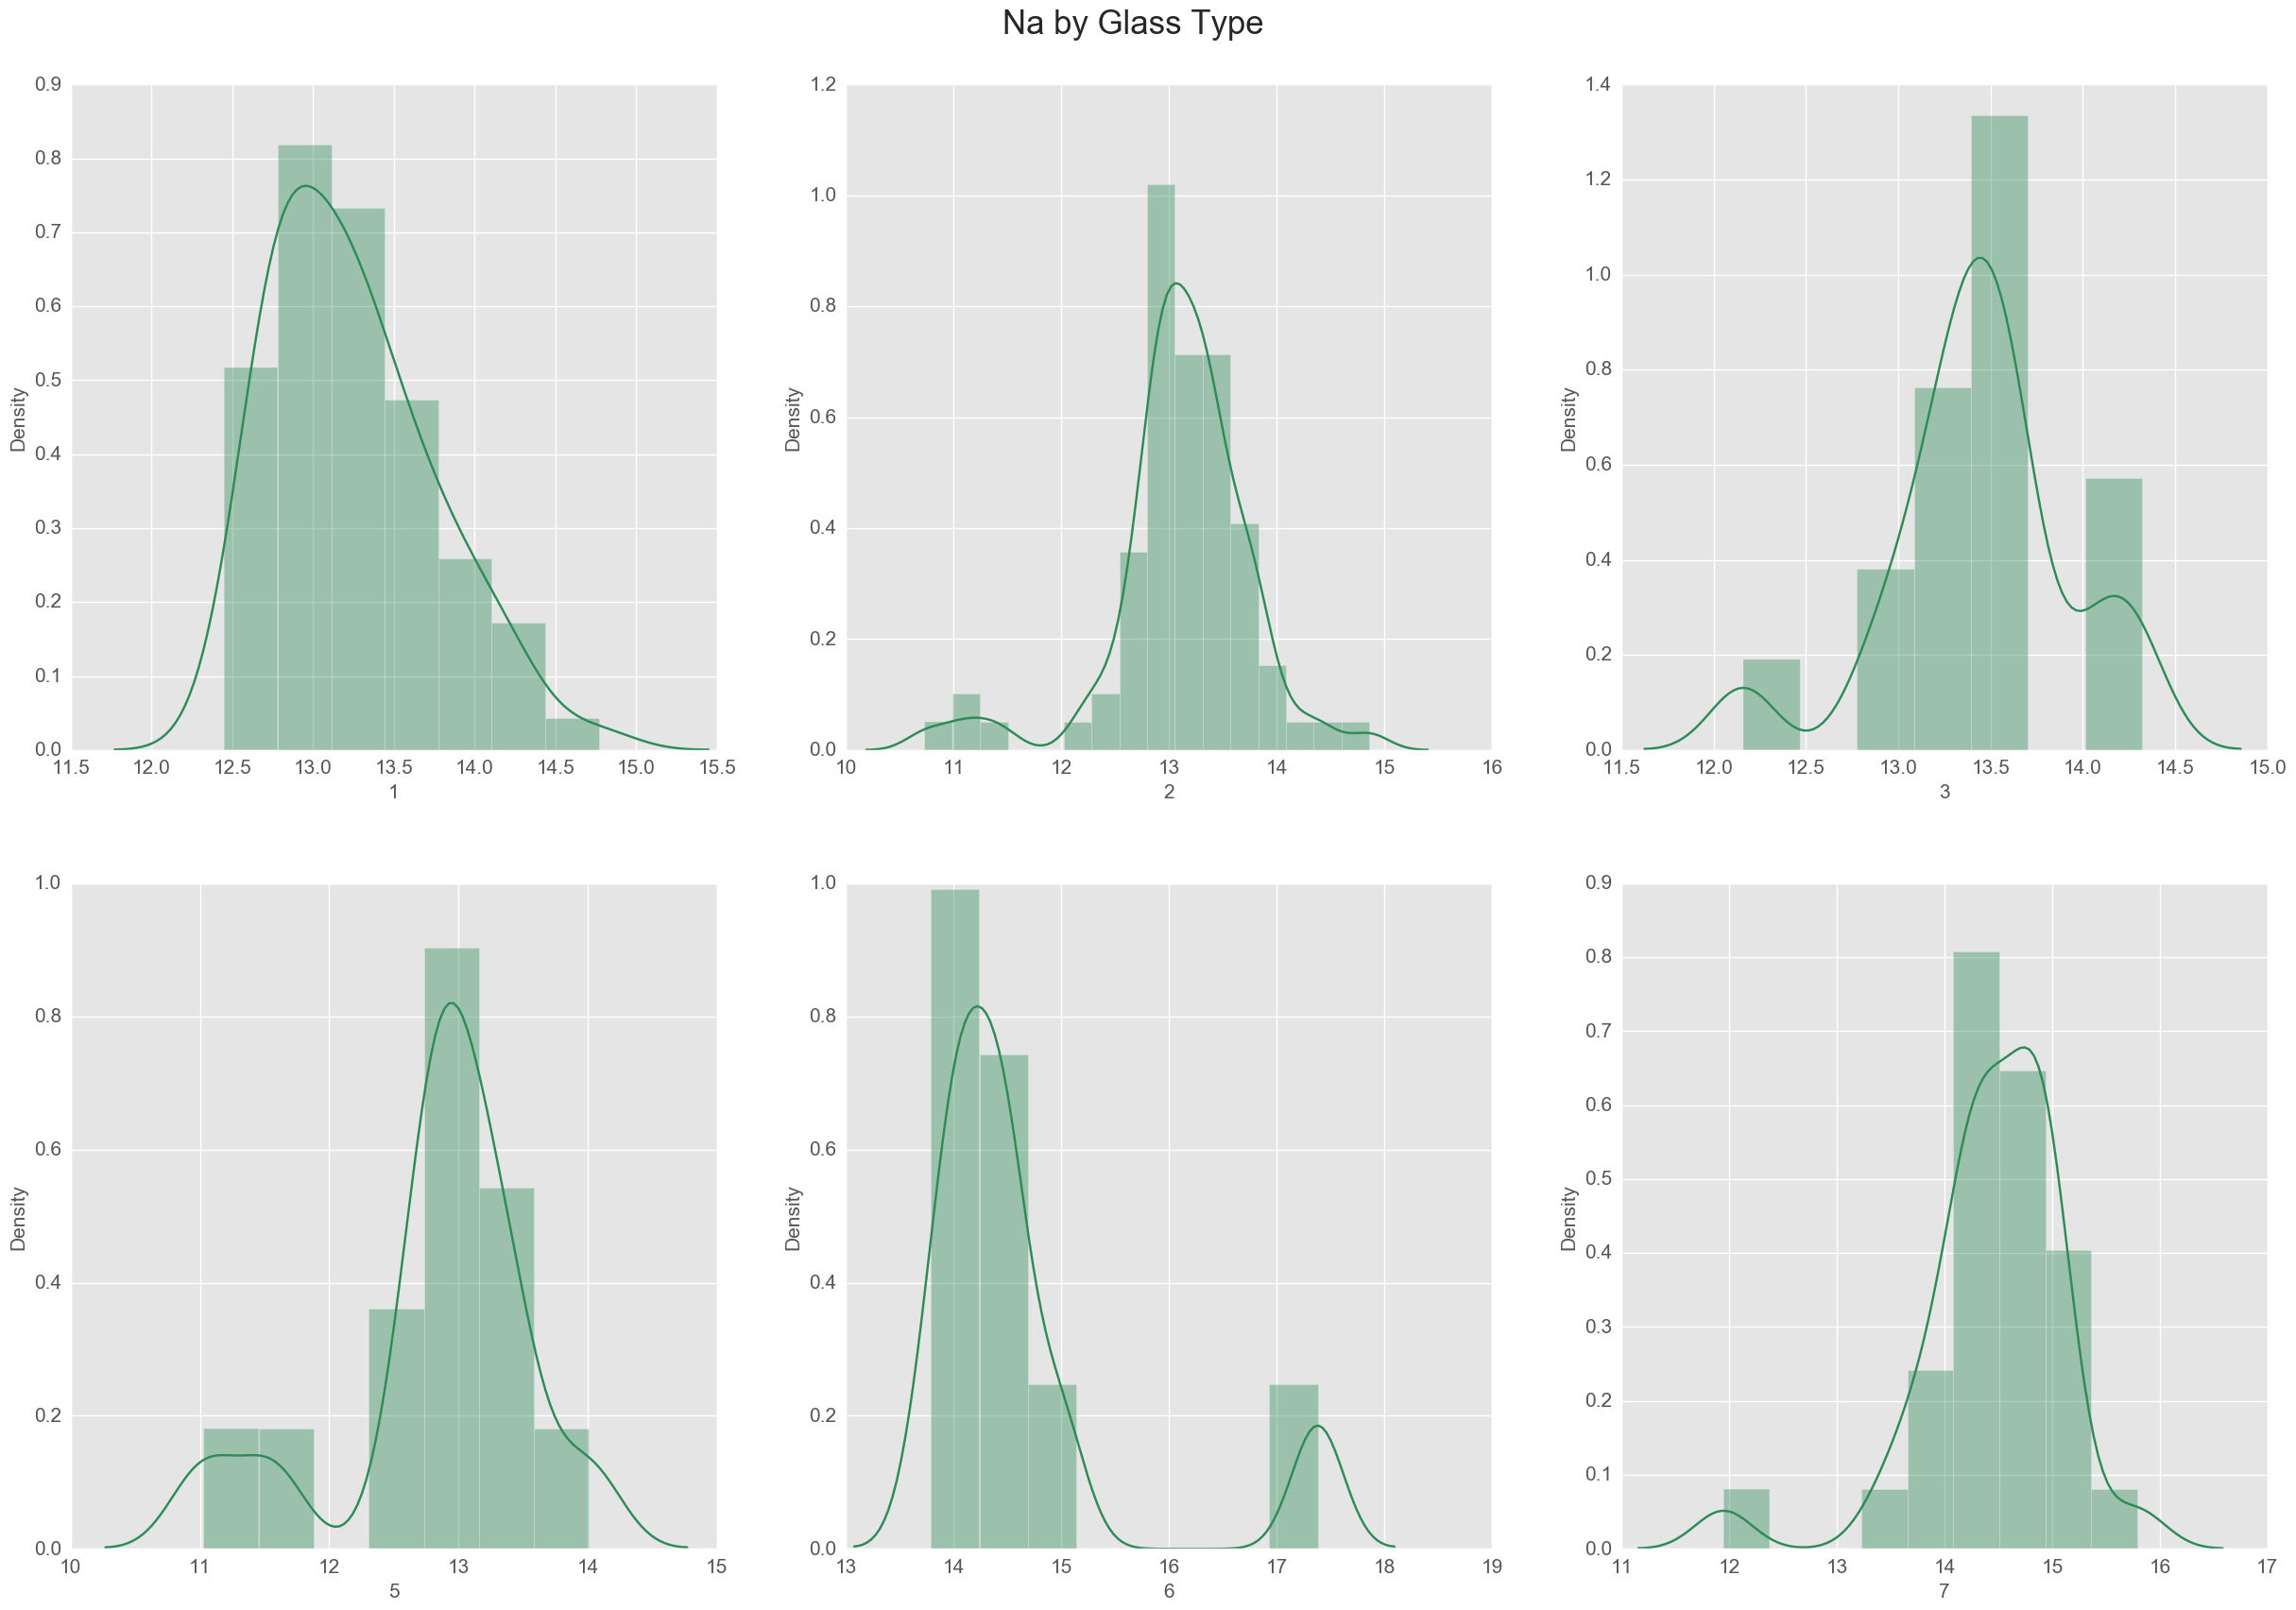

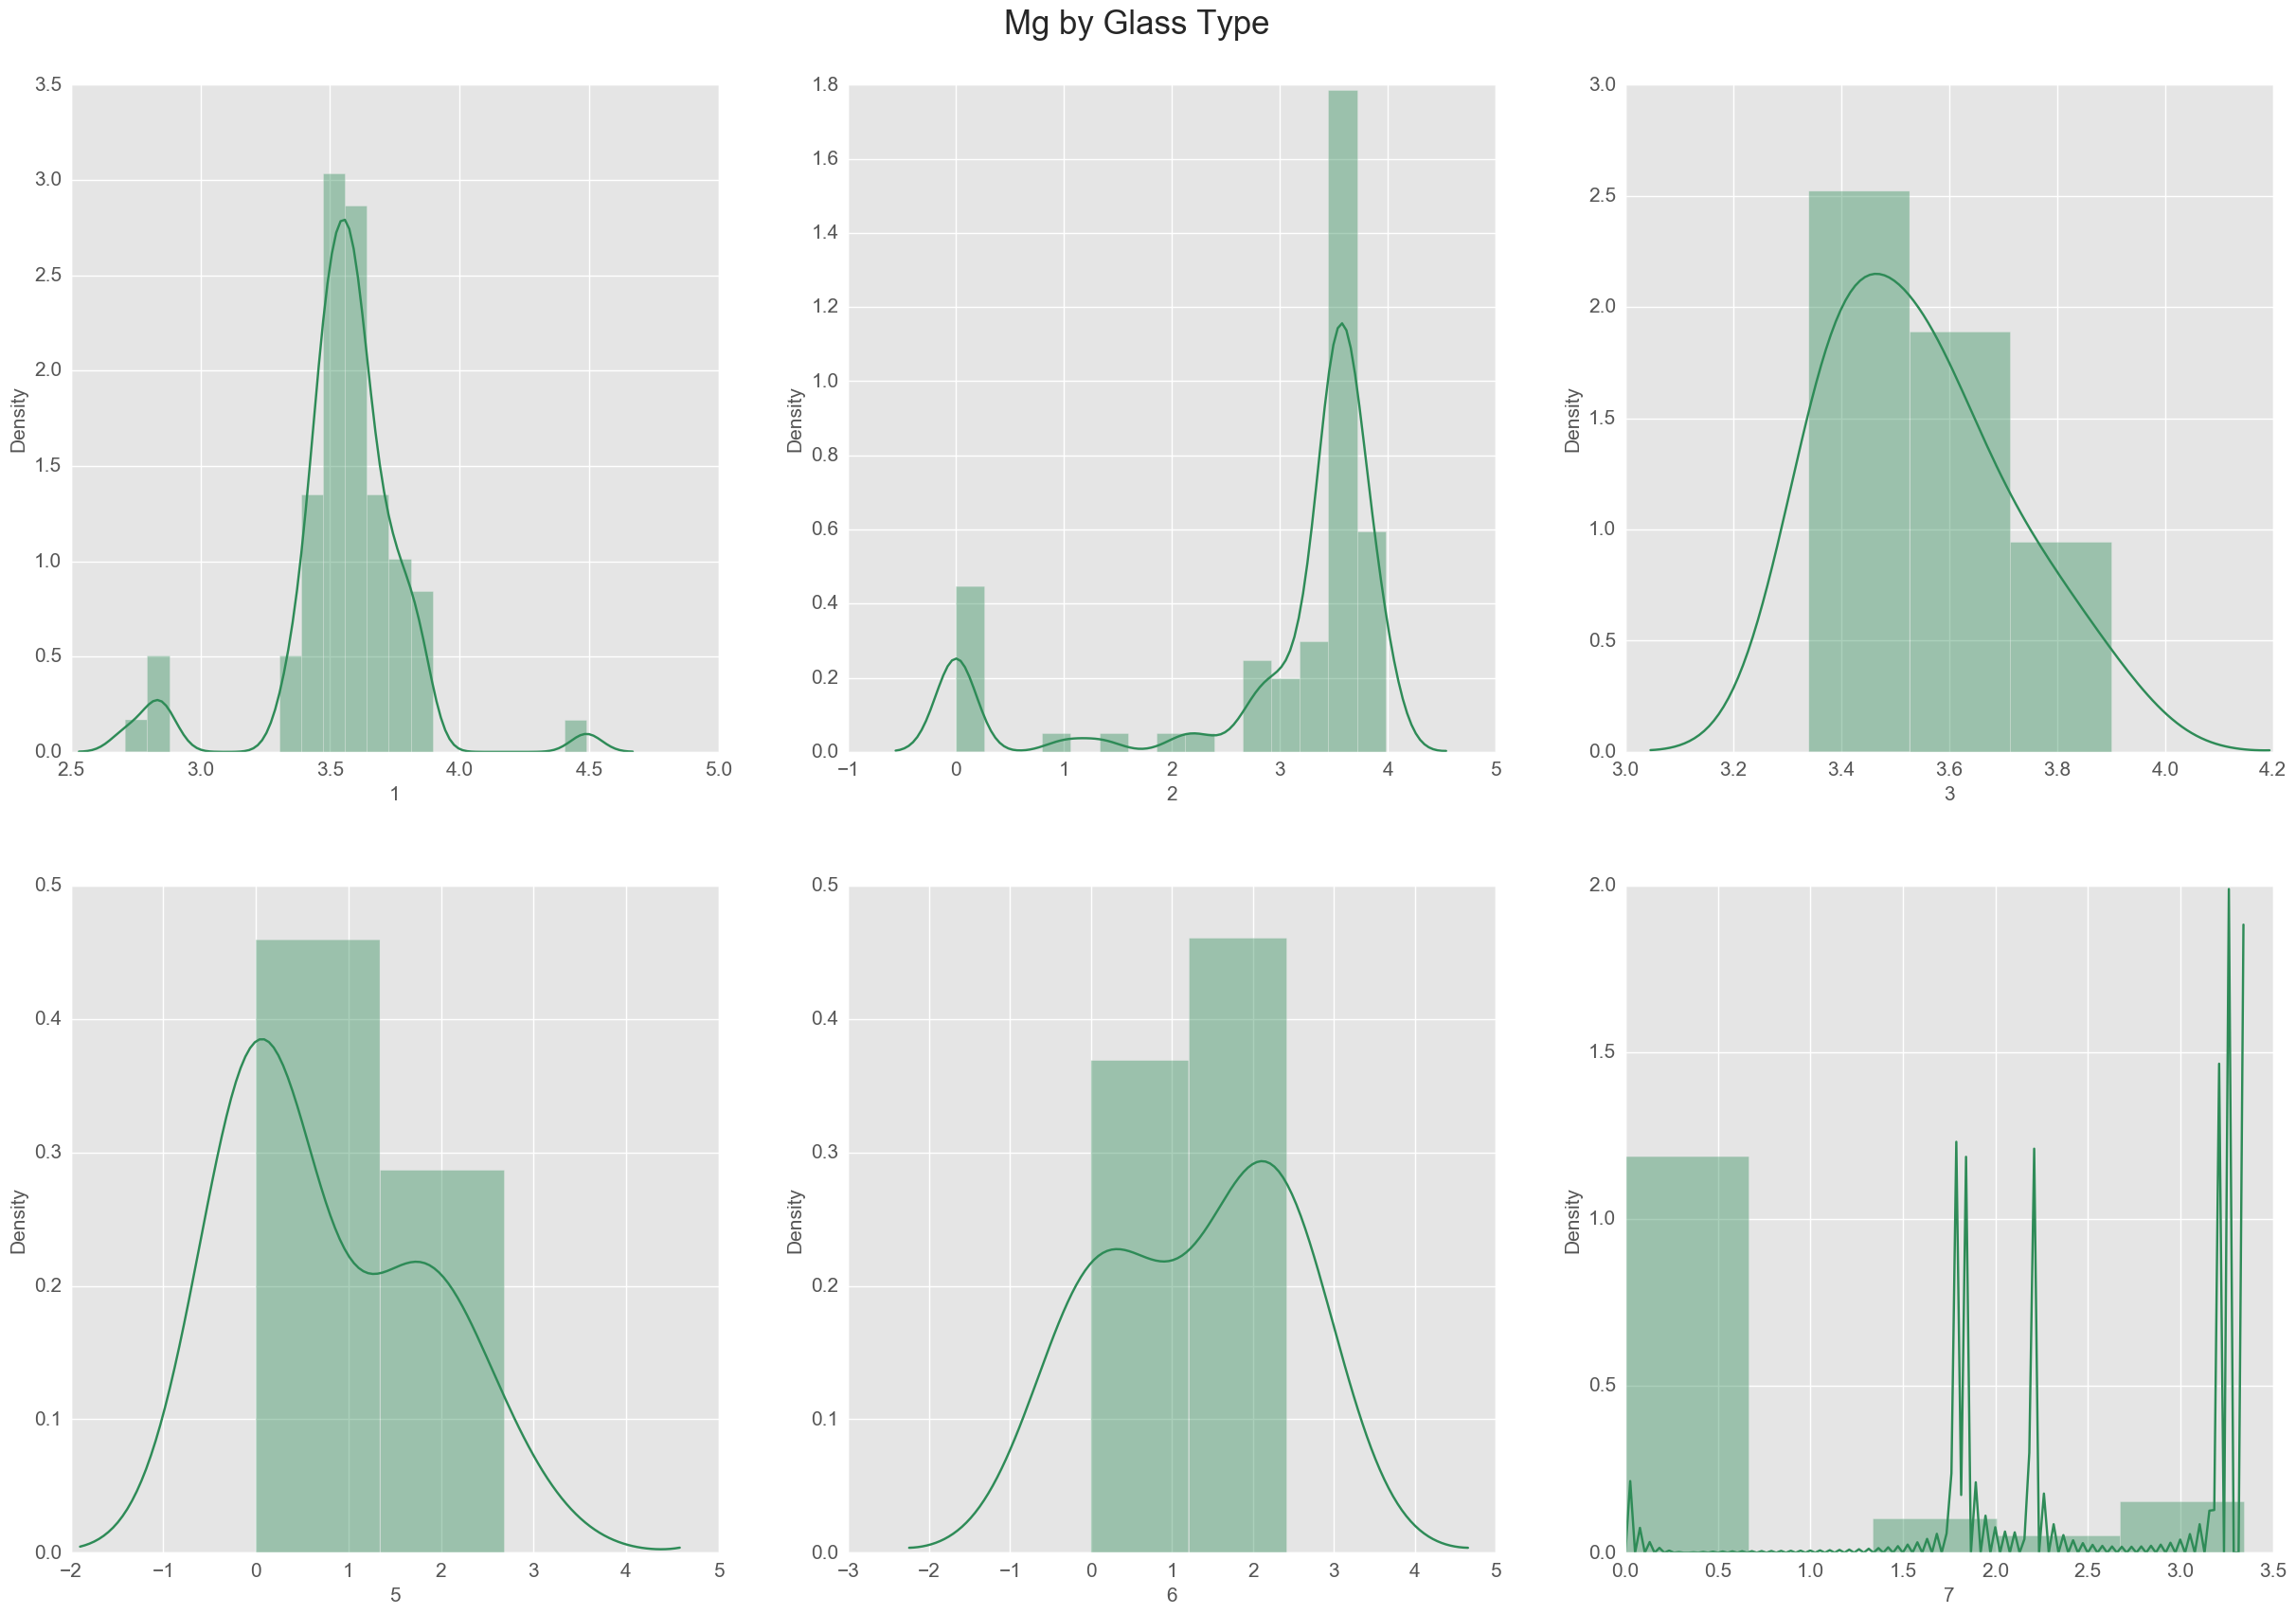

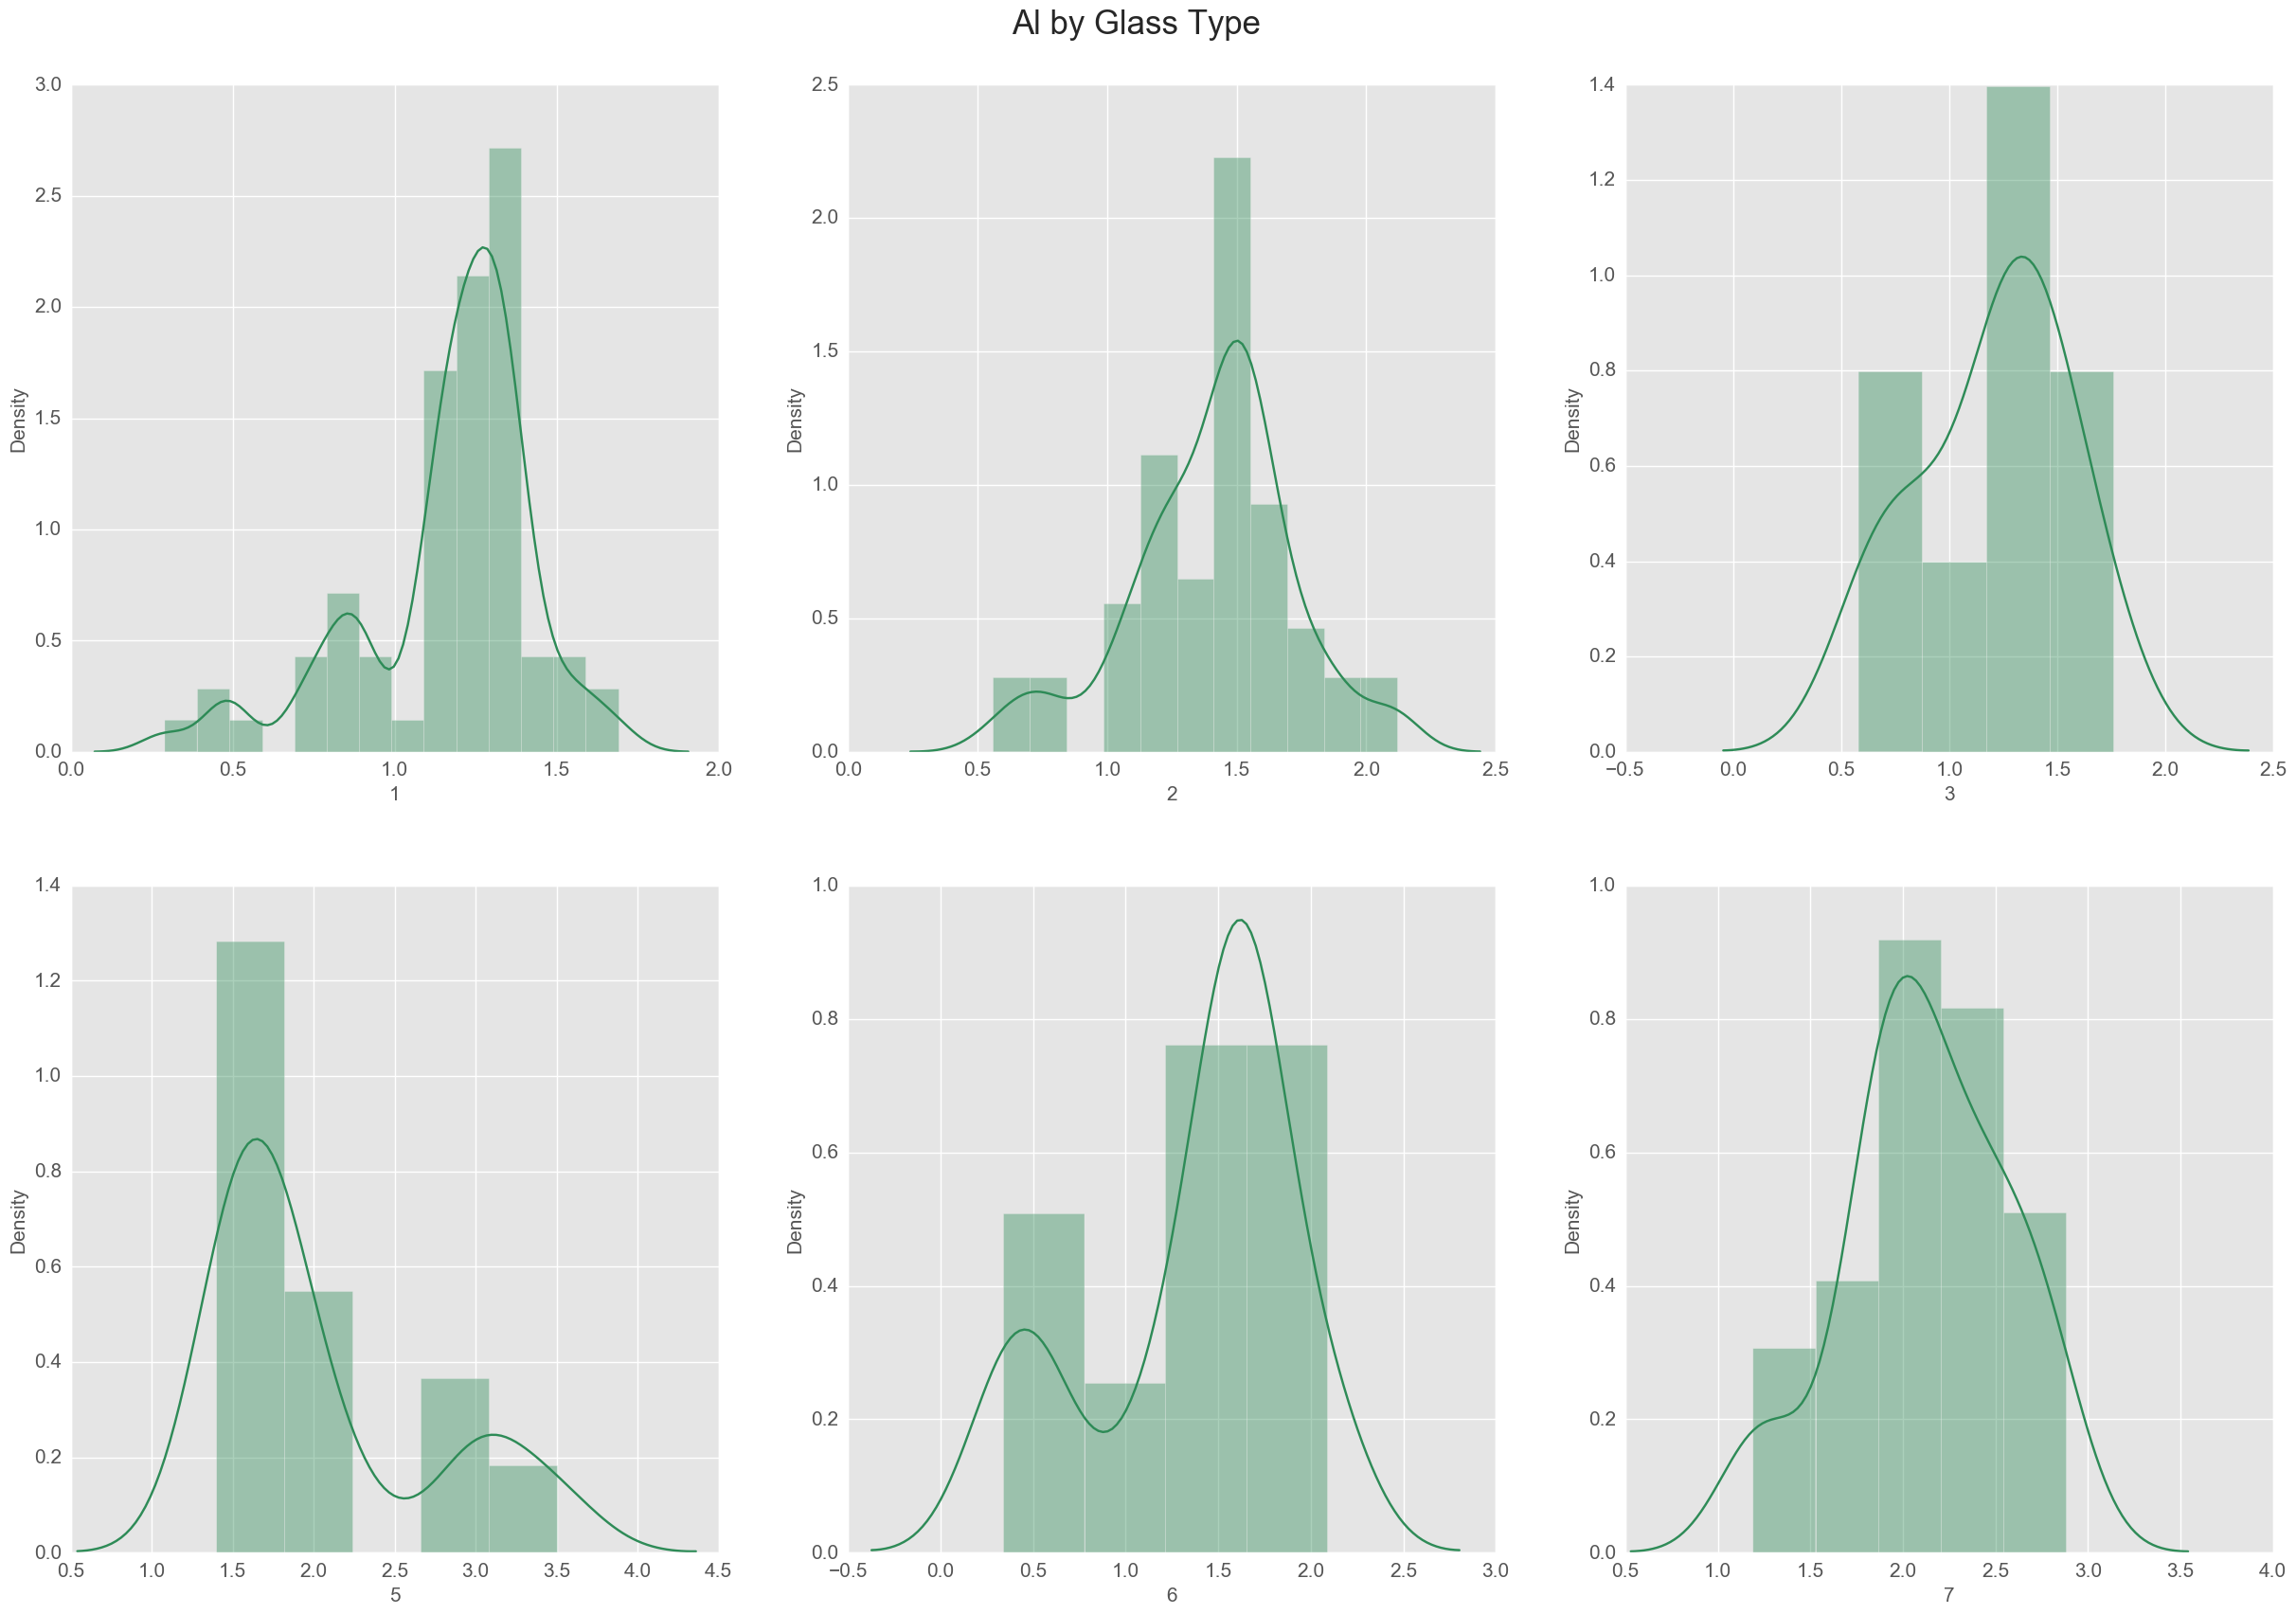

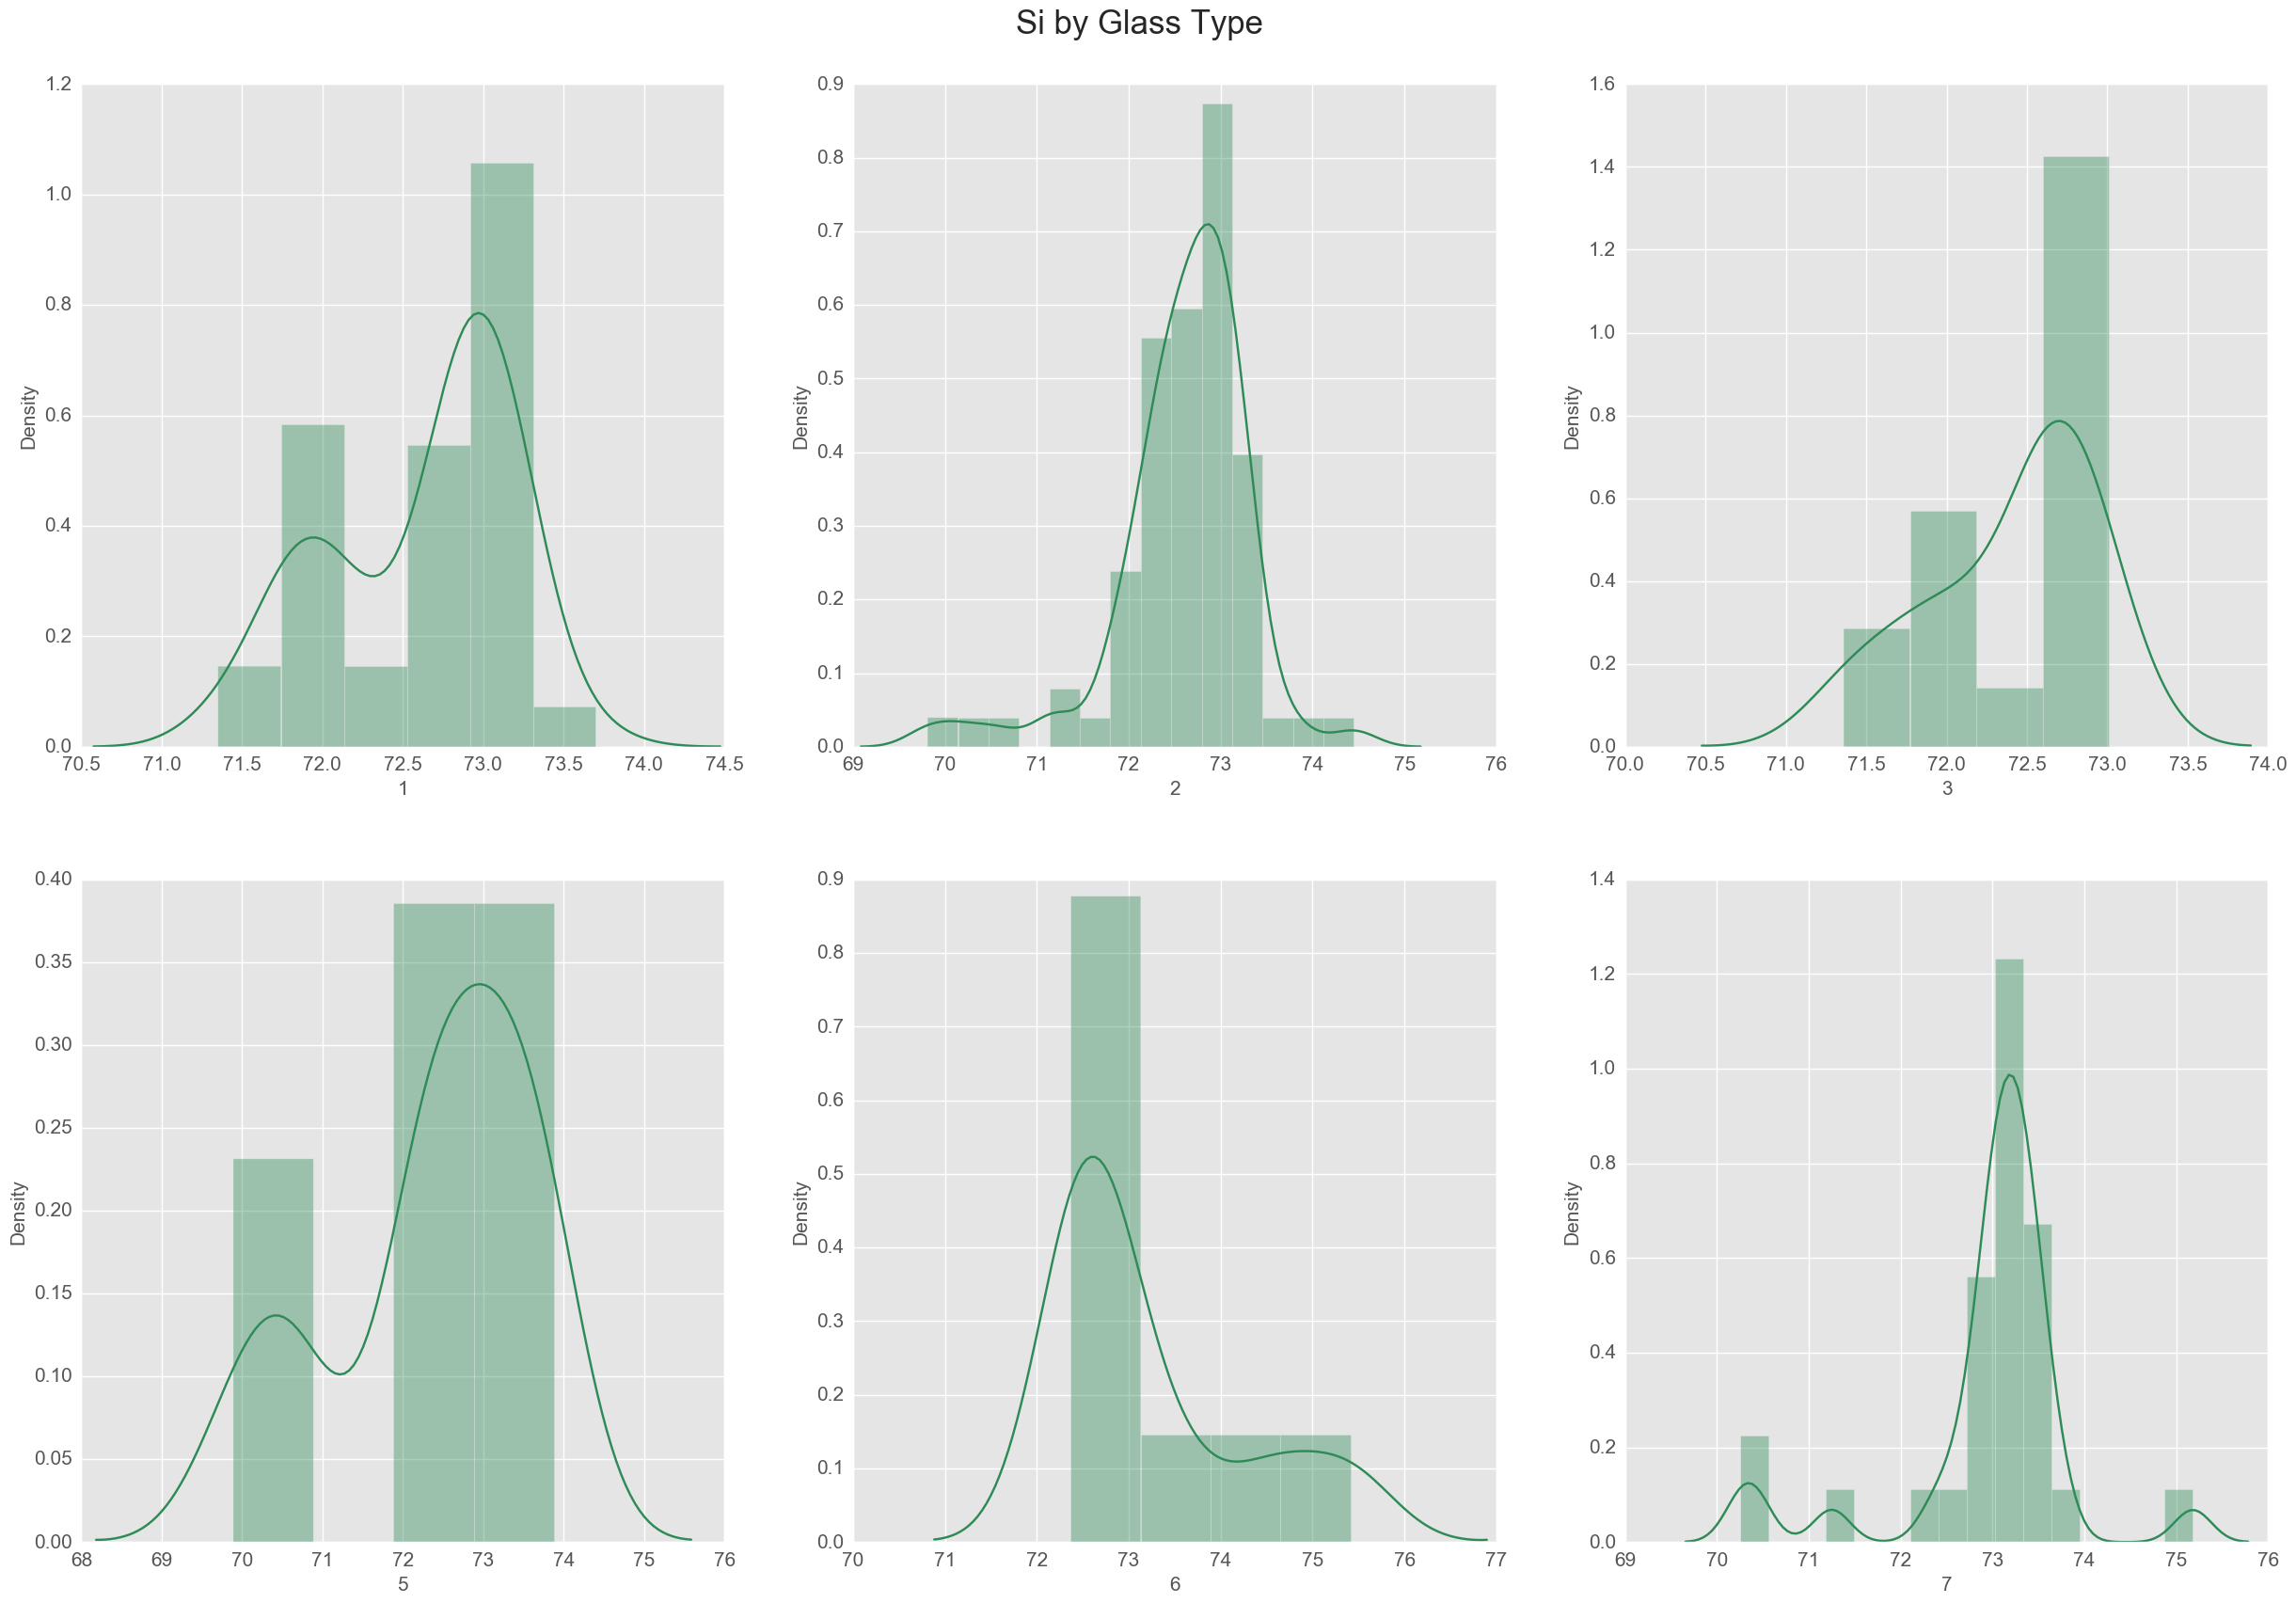

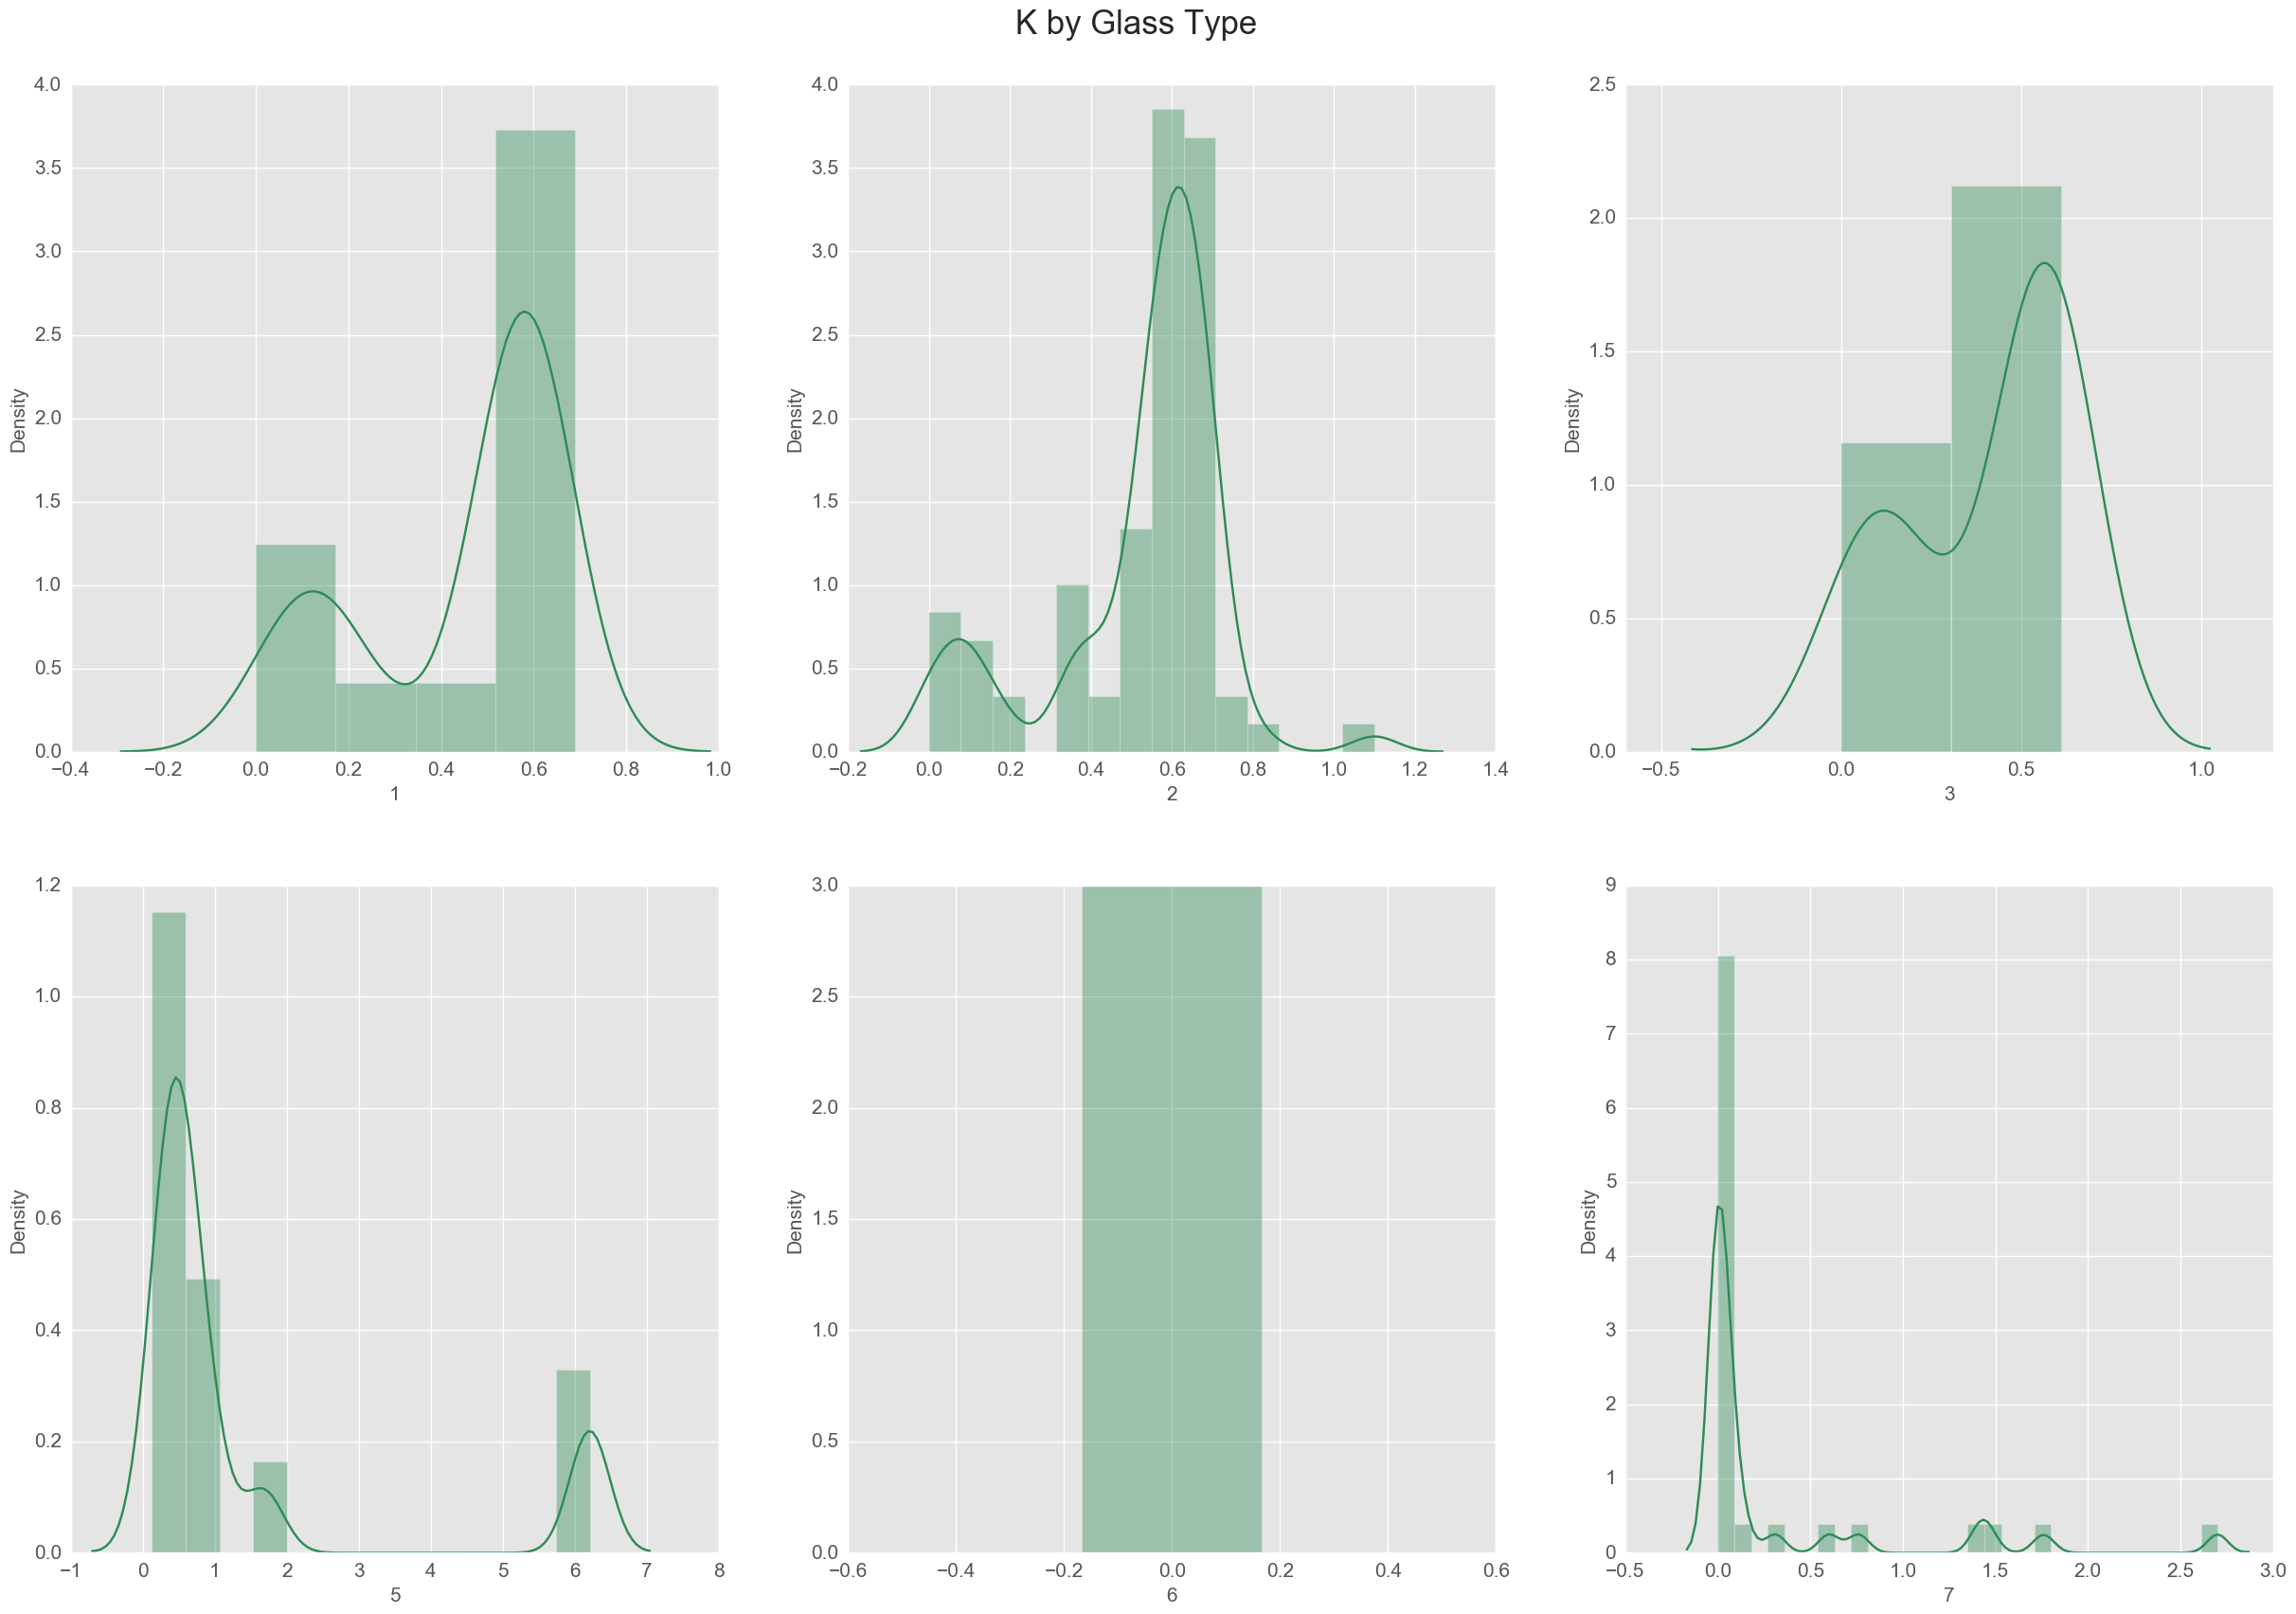

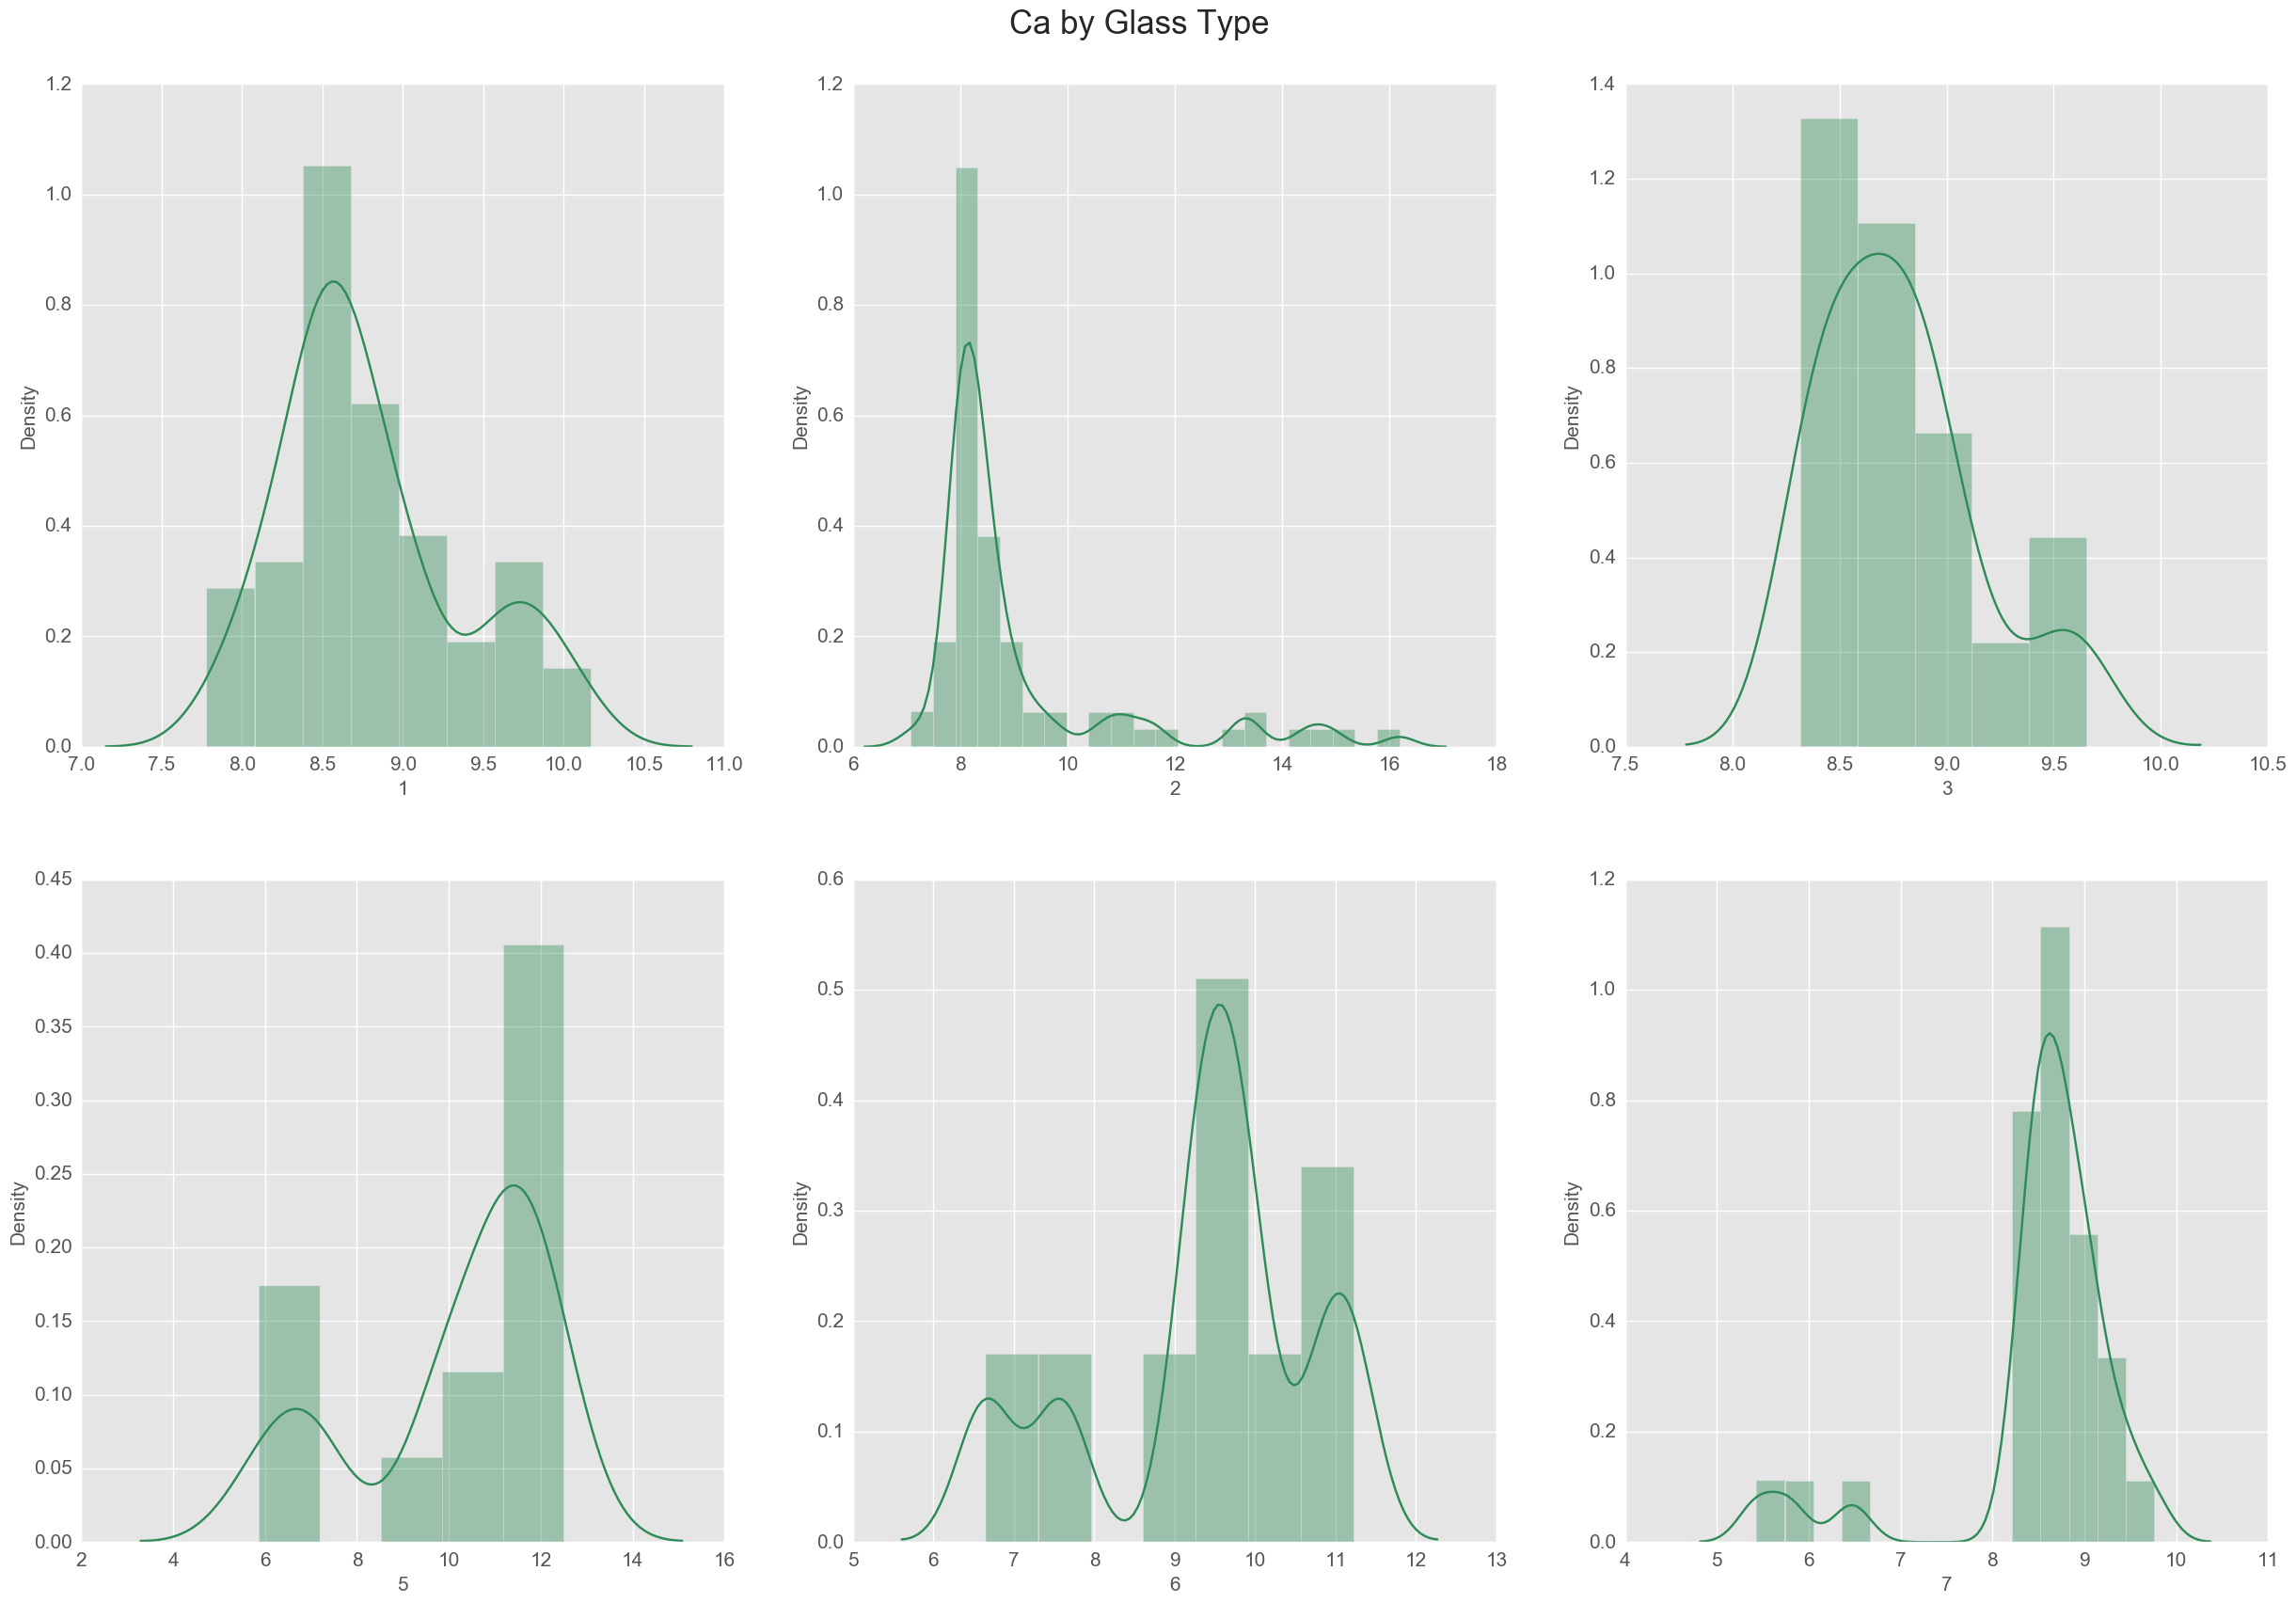

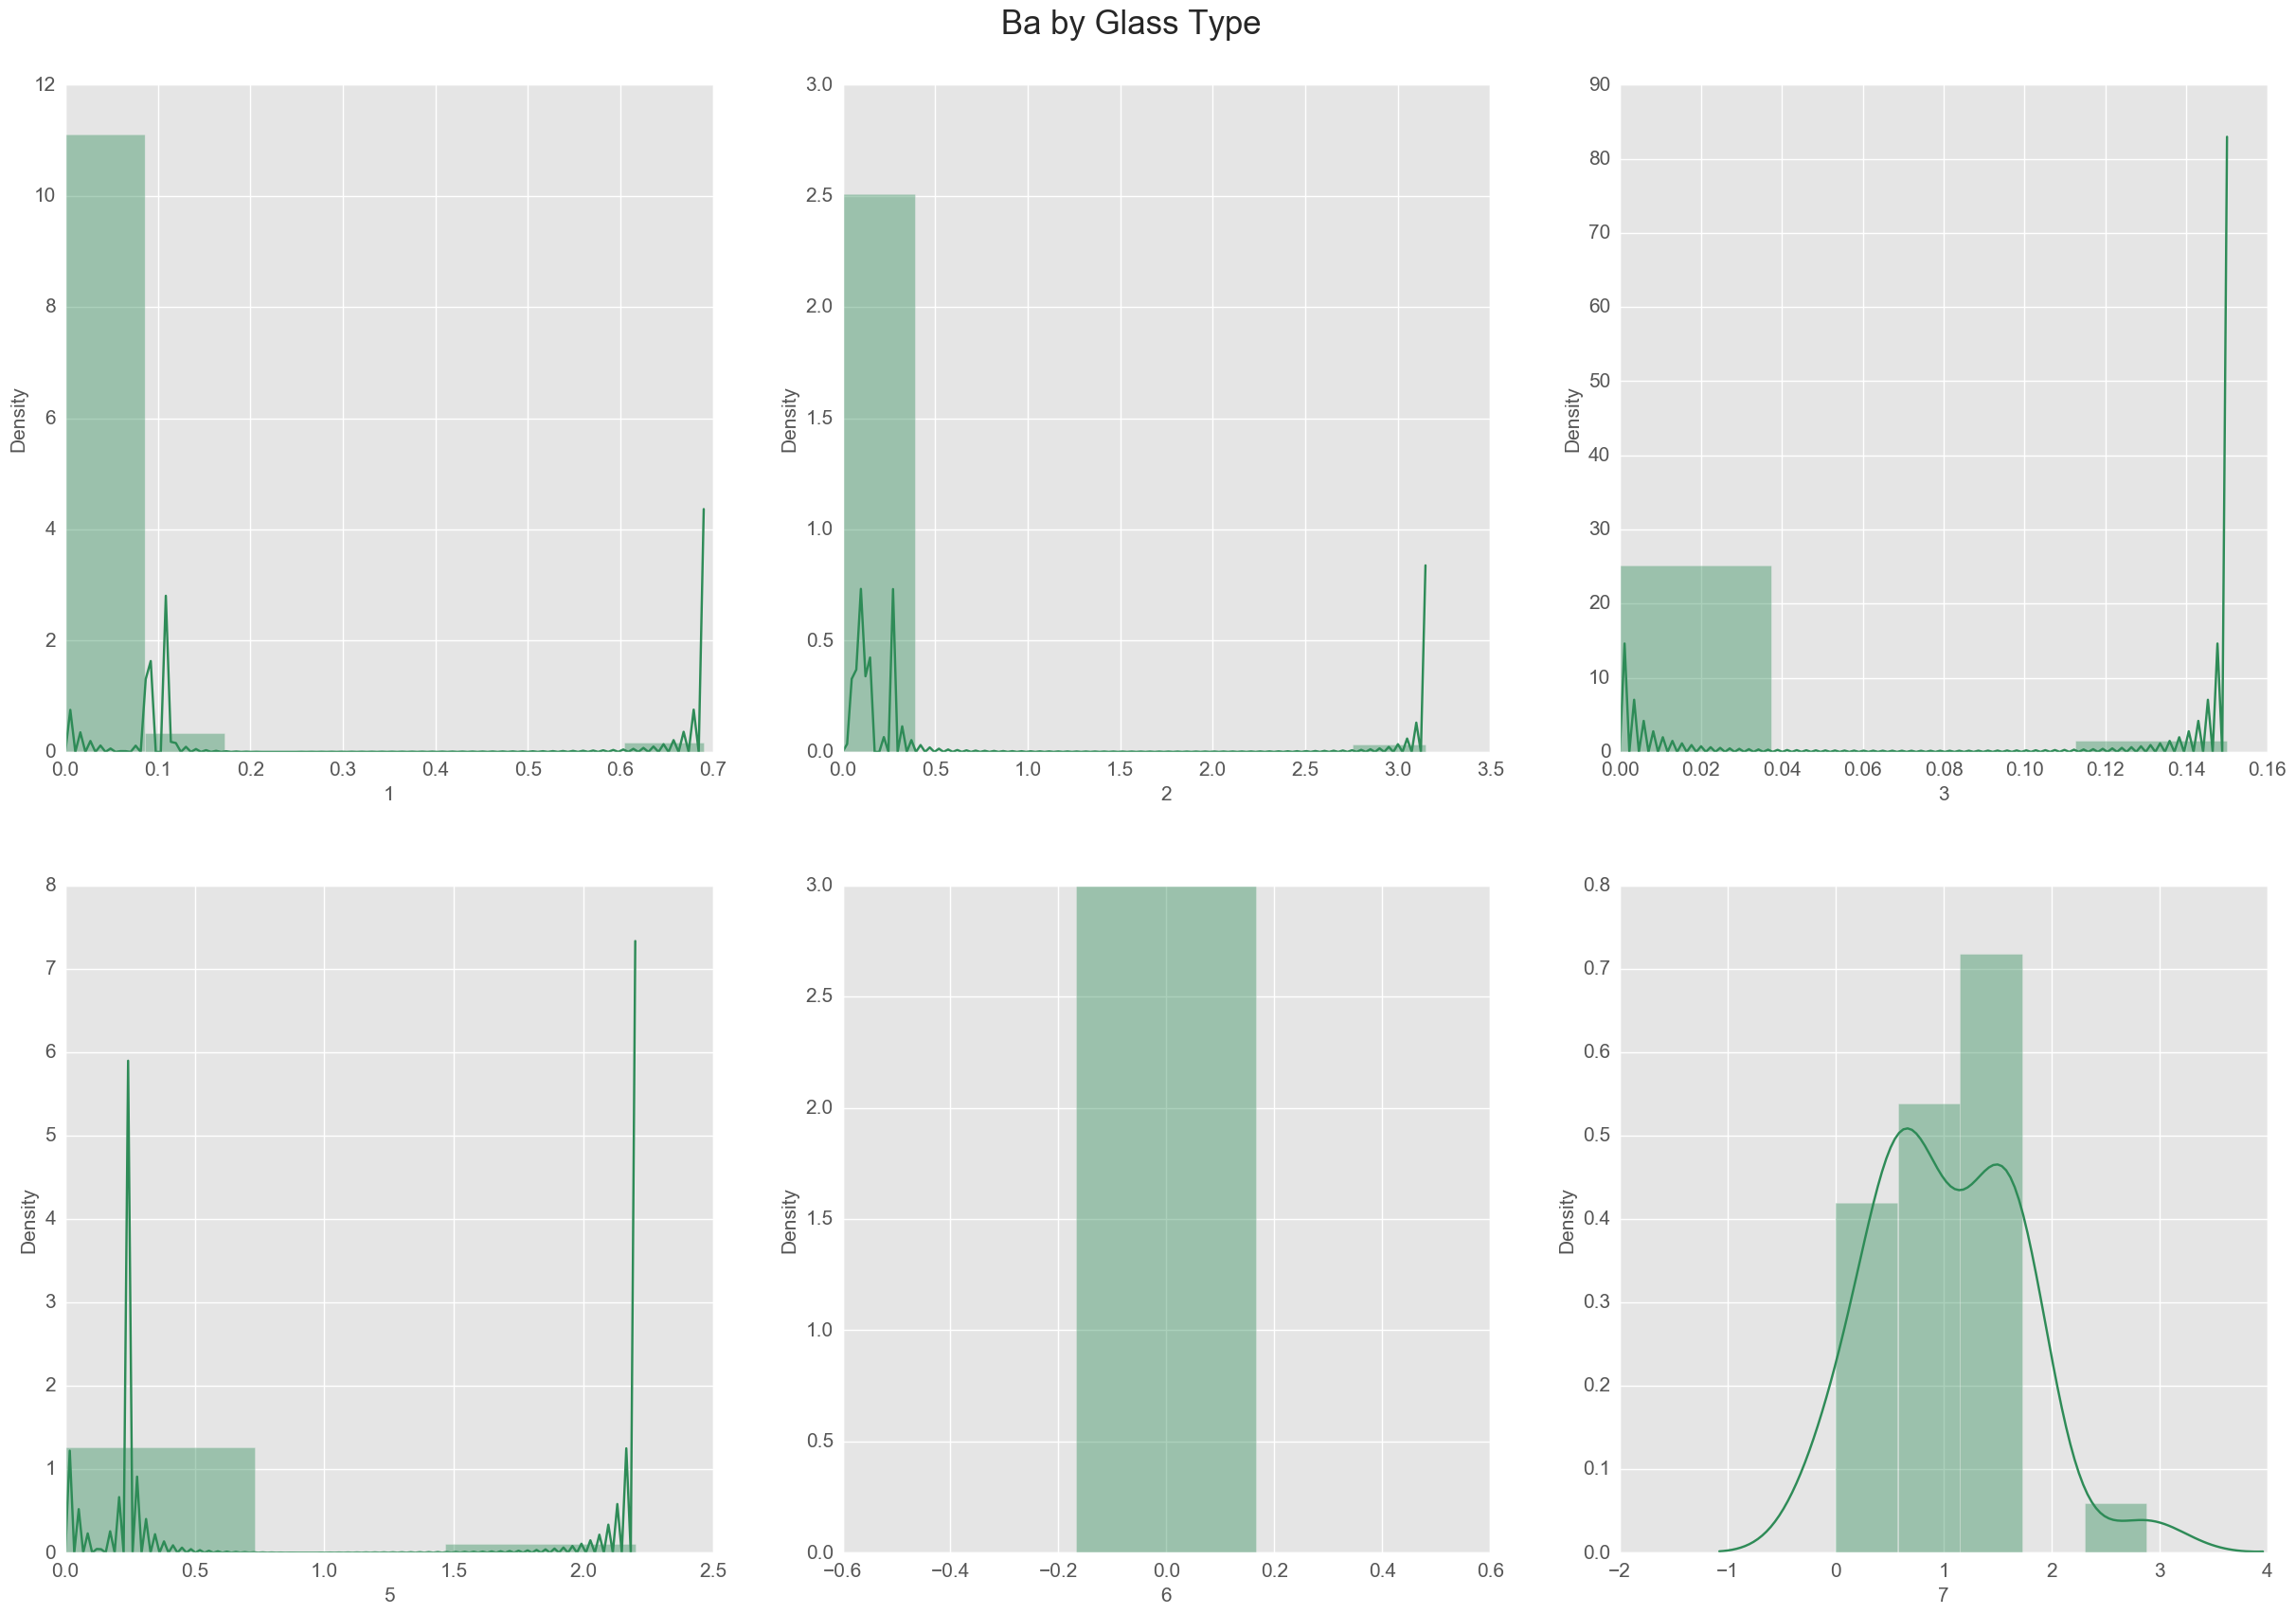

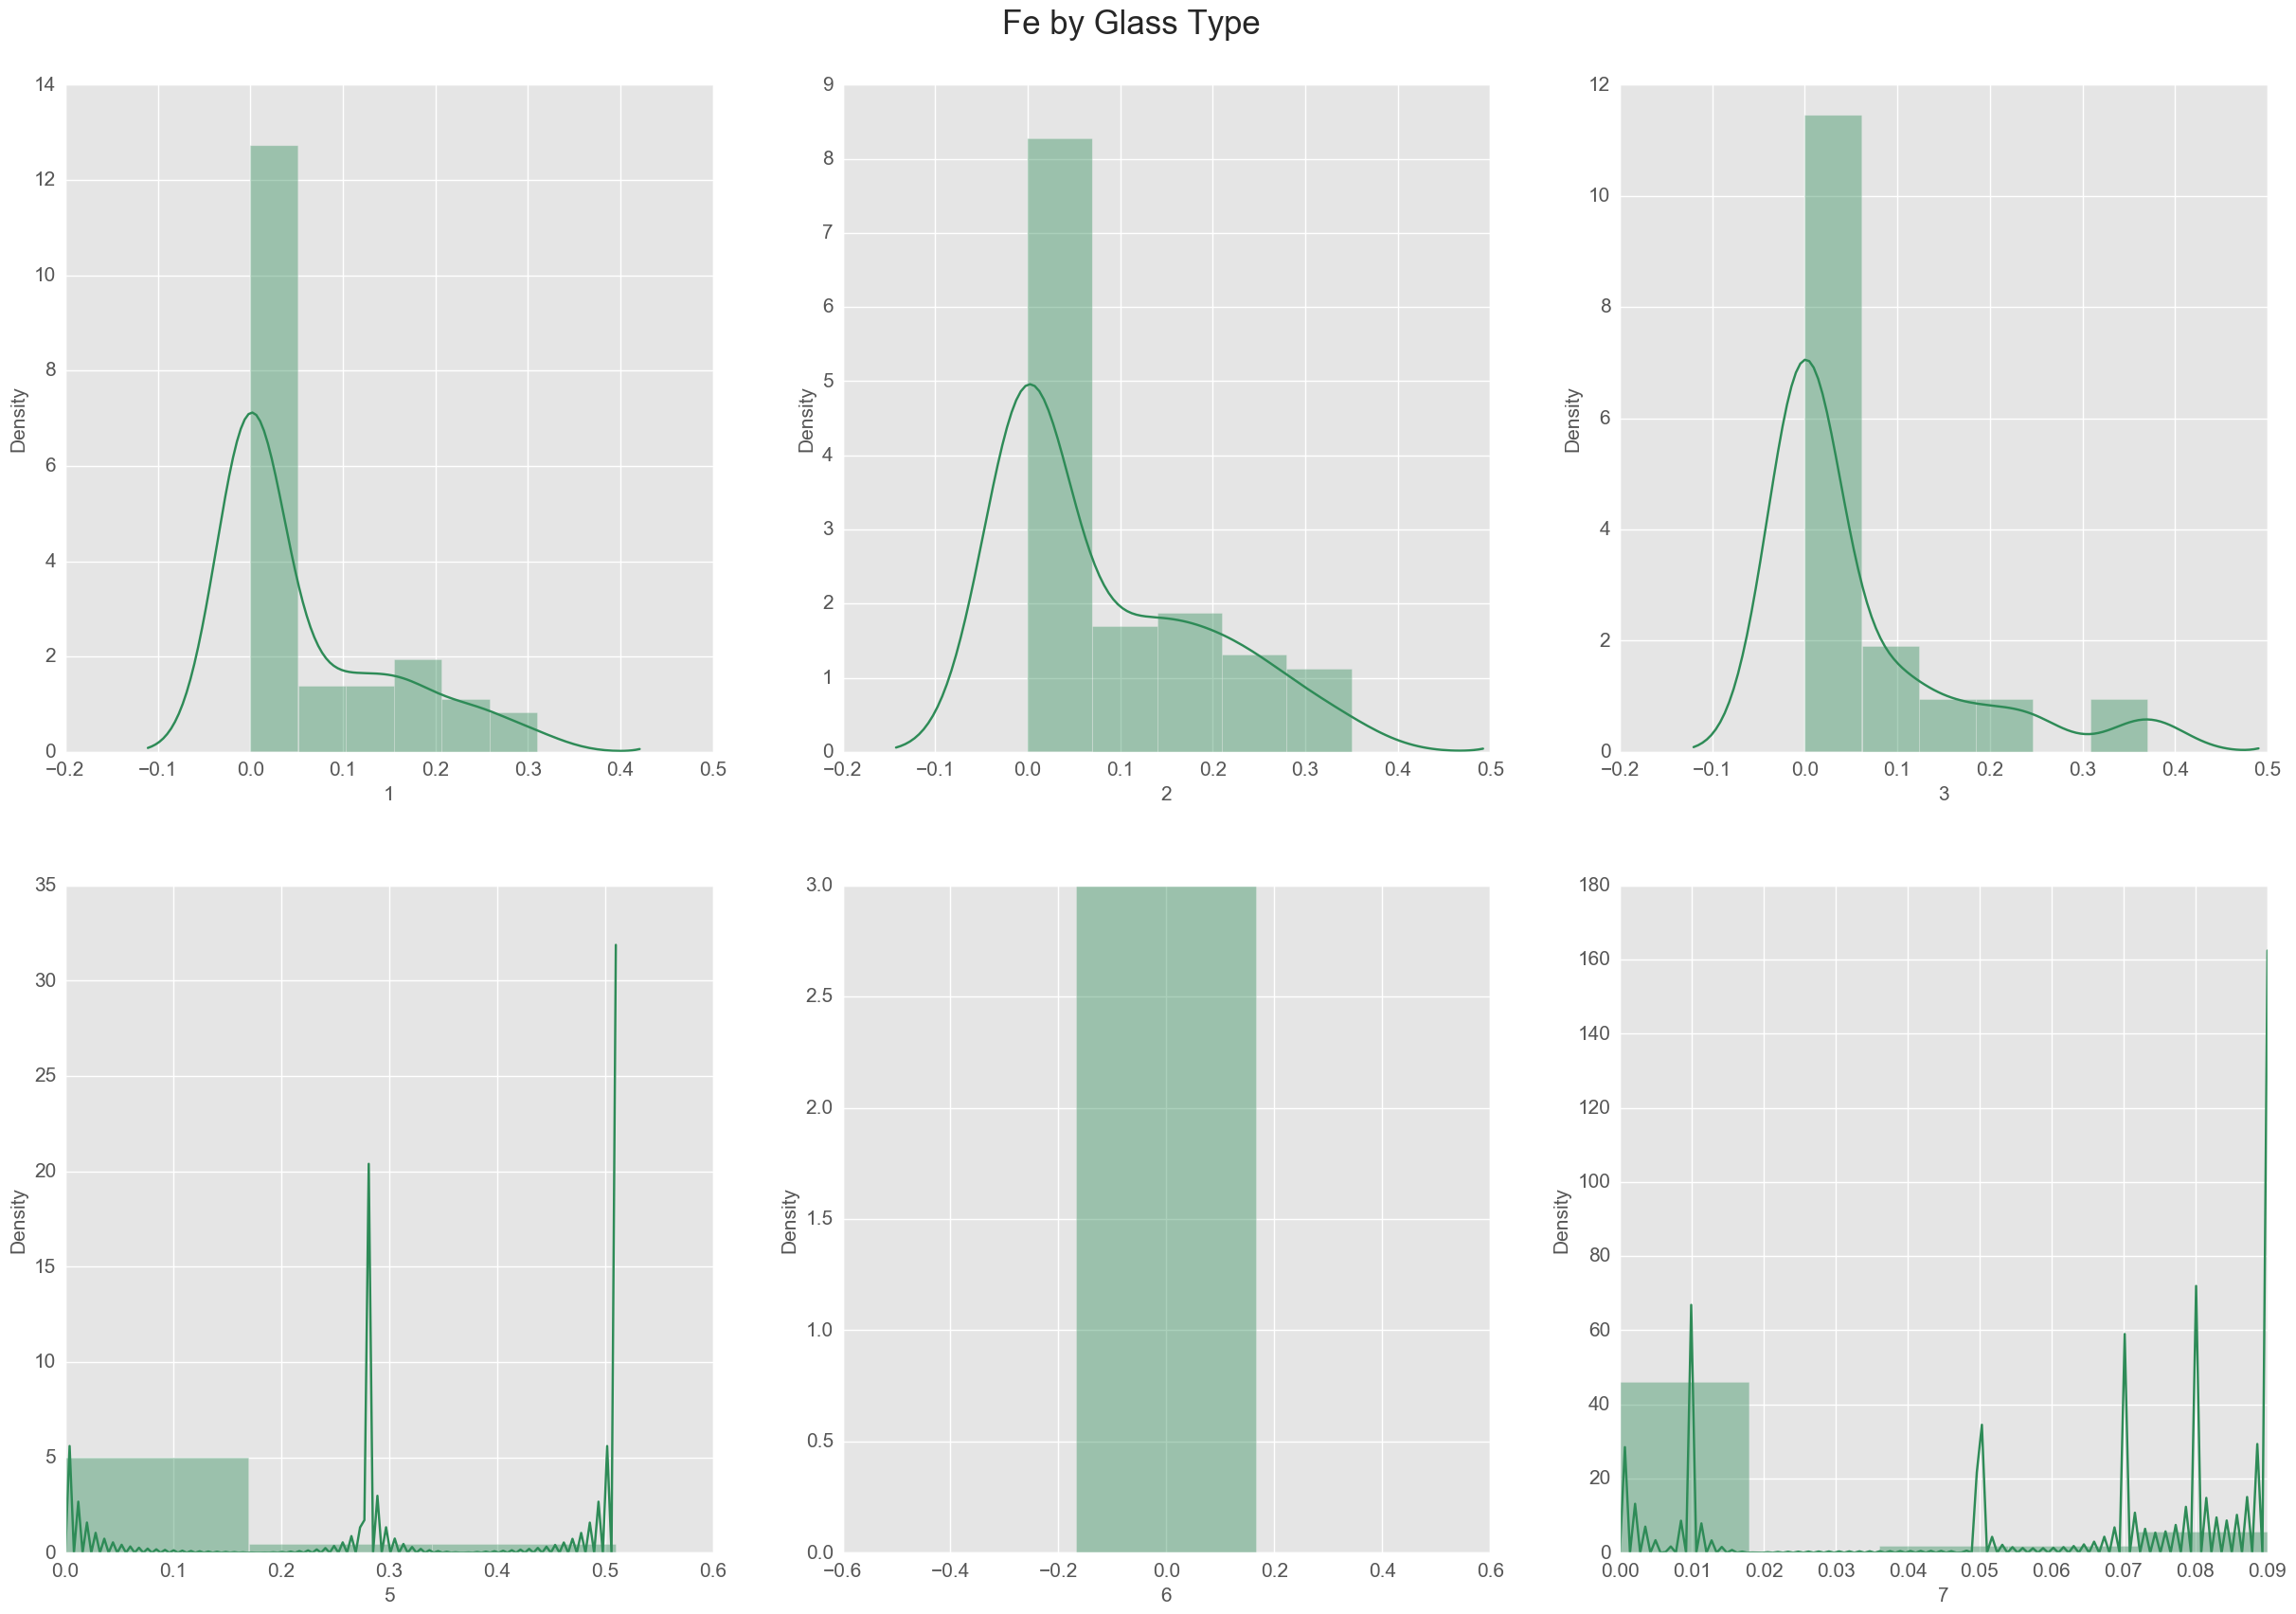

In [9]:
### Distributions on features by Glass Type 
col_name_li = df.columns[:-1]

for col_name in col_name_li:
    fig = plt.figure(figsize=[30, 20])
    plt.suptitle(col_name + ' by Glass Type', fontsize=25, y=0.94)
    for (i, default) in enumerate(list(np.unique(df['Type'])), start=1):
        axes = fig.add_subplot(2, 3, i)
        axes.tick_params(labelsize=15)    
        sns.distplot(df[col_name][df['Type'] == default].values, color='#2E8B57')
        axes.set_xlabel(default, fontsize=15)
        axes.set_ylabel('Density', fontsize=15)

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


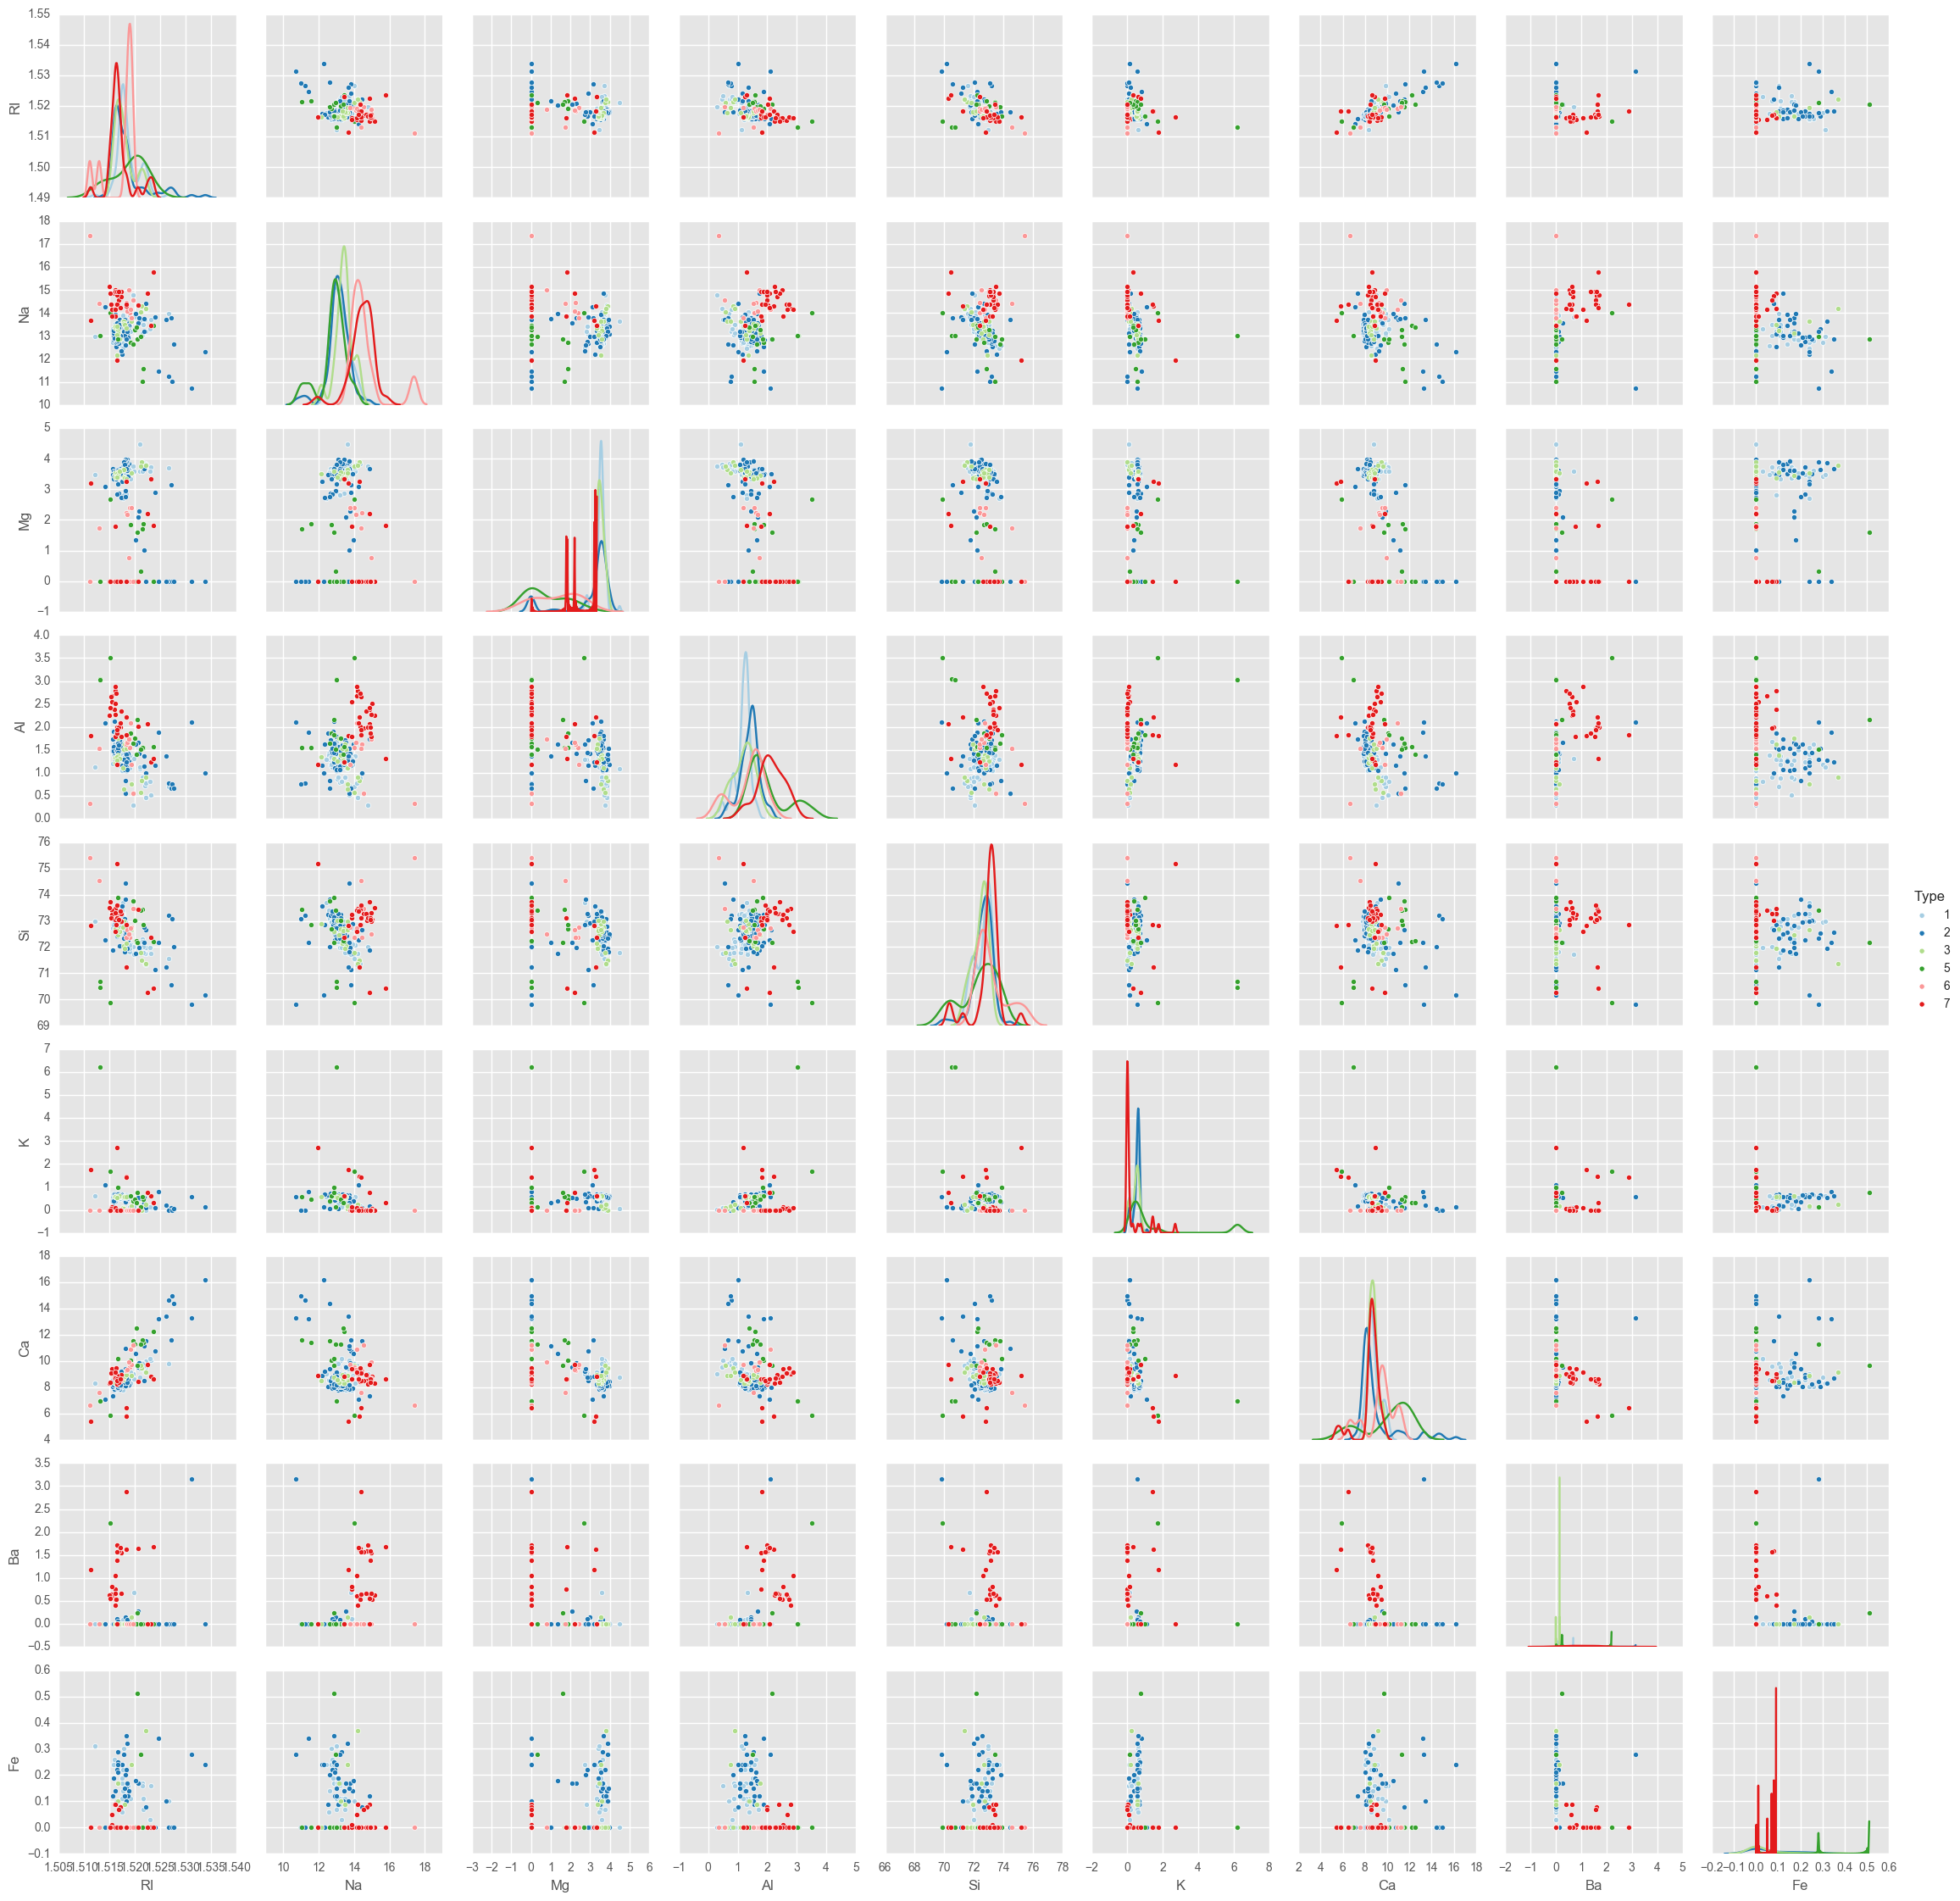

In [38]:
### Pairplot on features by Glass Type 
plt.figure(figsize=[50, 50])
sns.pairplot(df, vars=df.columns[:-1], hue='Type', palette='Paired', diag_kind='kde')

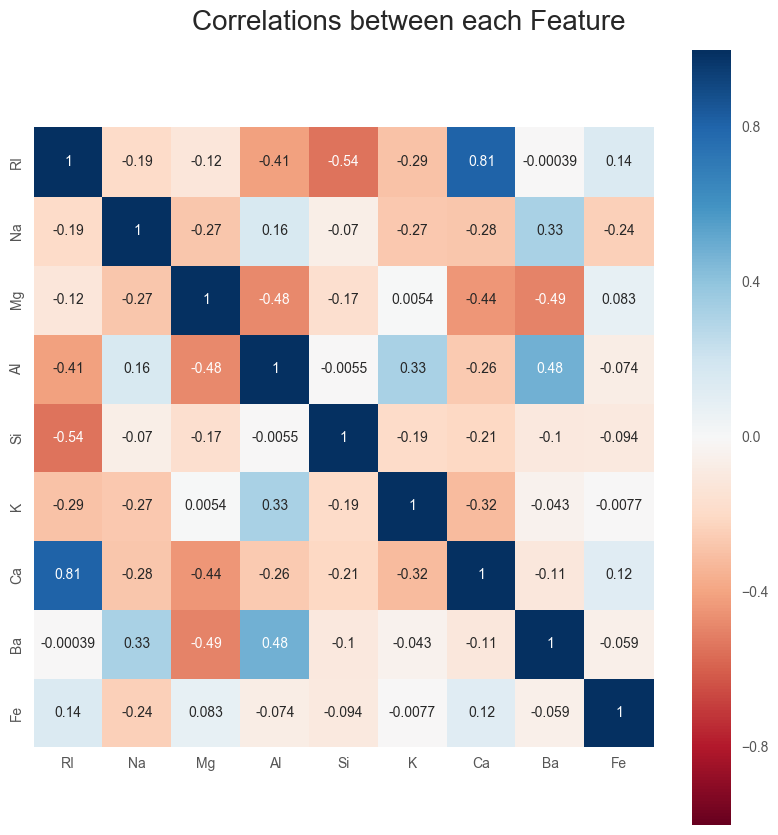

In [10]:
### correlations between each feature
cor_mat = df.ix[:, df.columns[:-1]].corr()

plt.figure(figsize=[10, 10])
sns.heatmap(cor_mat, square=True, annot=True, cmap="RdBu")
#plt.title('Correlations between each Feature', fontsize=20)
plt.suptitle('Correlations between each Feature', fontsize=20, y=0.94, horizontalalignment='center')

In [11]:
### get the correlated feature pairs

#print(cor_mat.index)

pair_li = []

for i in cor_mat.index:
    for j in cor_mat.index:
        if i == j:
            continue
        else:
            if np.round(np.abs(cor_mat.ix[i, j]), 1) >= 0.5:
                pair_li.append(tuple(sorted([i, j])))
            else:
                continue

print('\n')                
pair_li = list(set(pair_li))
print('Features pairs that have high correlations:')
print(pair_li)

intersect_li = []

for i in pair_li:
    temp_li = []
    temp_li.append(i)
    for j in pair_li:
        if i == j:
            continue
        else:
            if len(np.intersect1d(i, j)) != 0:
                temp_li.append(j)
            else:
                continue
    temp_li = tuple(sorted(temp_li))
    intersect_li.append(temp_li)

intersect_li = list(set(intersect_li))
print('\n')
print('Features pairs with high correlations that have overlapping values')
for i, pair in enumerate(intersect_li, start=1):
    print(str(i)+':', pair)



Features pairs that have high correlations:
[('RI', 'Si'), ('Al', 'Mg'), ('Al', 'Ba'), ('Ba', 'Mg'), ('Ca', 'RI')]


Features pairs with high correlations that have overlapping values
1: (('Ca', 'RI'), ('RI', 'Si'))
2: (('Al', 'Ba'), ('Al', 'Mg'), ('Ba', 'Mg'))


Features pairs with high correlations (equal to or higher than 0.5), taking the values close to 0.5 into account: 
(Al, Mg)
(Si, Rl)
(Ca, Rl)
(Ba, Mg)
(Ba, Al)

In [12]:
### to test if features has high correlations with the target values
# using the ANOVA

from scipy.stats import f_oneway

def cal_anova(val, label_val, label_li):
    val_li = []
    for label in label_li:
        val_li.append(val[label_val==label])
    return f_oneway(*val_li)

anova_table = pd.DataFrame(columns=['F_value', 'P_value'], index=df.columns[:-1])

for i in df.columns[:-1]:
    anova_table.ix[i, :] = cal_anova(df[i].values, df['Type'].values, np.unique(df['Type'].values))
print(anova_table.sort_values(['F_value'], ascending=False))

    F_value      P_value
Mg  65.5445  7.28291e-41
Ba  38.9746  3.83947e-28
Al  35.7267  2.59028e-26
Na   28.548  5.40937e-22
K   8.74813  1.50724e-07
Ca  2.97143    0.0129735
Si  2.78733    0.0184638
Fe  2.71088    0.0213591
RI  1.60896     0.159031


In [13]:
### from the correlations outcome above, pick up the useful features
for i, pair in enumerate(intersect_li, start=1):
    print(i, pair)

from itertools import chain 
for i, pair in enumerate(intersect_li, start=1):
    print(i, np.unique(list(chain(*pair))))

# remove "RI" and reserve the "Ca" and "Si"
# remove "Al" and "Ba", and reserve "Mg"

1 (('Ca', 'RI'), ('RI', 'Si'))
2 (('Al', 'Ba'), ('Al', 'Mg'), ('Ba', 'Mg'))
1 ['Ca' 'RI' 'Si']
2 ['Al' 'Ba' 'Mg']


Here are the Features not used for modeling: 'RI', 'Al', 'Ba'

In [14]:
### extract the features used for modeling 
feature_li = df.columns[:-1]
feature_not_li = ['RI', 'Al', 'Ba']

feature_li = np.setdiff1d(feature_li, feature_not_li)
print(feature_li)

X = df.ix[:, feature_li]
y = df['Type']
print(X.head())
print(y.head())

['Ca' 'Fe' 'K' 'Mg' 'Na' 'Si']
     Ca   Fe     K    Mg     Na     Si
0  8.75  0.0  0.06  4.49  13.64  71.78
1  7.83  0.0  0.48  3.60  13.89  72.73
2  7.78  0.0  0.39  3.55  13.53  72.99
3  8.22  0.0  0.57  3.69  13.21  72.61
4  8.07  0.0  0.55  3.62  13.27  73.08
0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64


## Modeling 

since the number of each label is not large enough, I evaluate the model simply based on the cross-validation set

In [17]:
### set the stratified splitter 

from sklearn.cross_validation import StratifiedKFold
skf_splitter = StratifiedKFold(y, n_folds=5, shuffle=True, random_state=100)
for ind in skf_splitter:
    None
    #print(ind)
#print(len(skf_splitter))

In [18]:
### building the model and evaluate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

accuracy_mean = 0
precision_mean = np.zeros(len(np.unique(y)))
recall_mean = np.zeros(len(np.unique(y)))
f1_mean = np.zeros(len(np.unique(y)))

for ind in skf_splitter:
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X.values[ind[0]], y.values[ind[0]])
    prediction = model.predict(X.values[ind[1]])
    
    print('Accuracy:\n', model.score(X.values[ind[1]], y.values[ind[1]]))
    accuracy_mean += model.score(X.values[ind[1]], y.values[ind[1]])
    print('Preision, Recall and F1:\n', precision_recall_fscore_support(y.values[ind[1]], prediction))
    precision_mean += precision_recall_fscore_support(y.values[ind[1]], prediction)[0]
    recall_mean += precision_recall_fscore_support(y.values[ind[1]], prediction)[1]
    f1_mean += precision_recall_fscore_support(y.values[ind[1]], prediction)[2]
    #print('Confusion Matrix:\n', confusion_matrix(y.values[ind[1]], prediction))
    print('Confusion Matrix:\n', pd.DataFrame(confusion_matrix(y.values[ind[1]], prediction), columns=sorted(np.unique(y)), 
                                             index=sorted(np.unique(y))))
    print('======================================================================\n\n')

fold = 5
print('Average Accuracy:', accuracy_mean/fold)
print('Average Precision:', precision_mean/fold)
print('Average Recall:', recall_mean/fold)
print('Average F1 score:', f1_mean/fold)

Accuracy:
 0.755555555556
Preision, Recall and F1:
 (array([ 0.6875    ,  0.8125    ,  1.        ,  1.        ,  1.        ,
        0.66666667]), array([ 0.78571429,  0.8125    ,  0.25      ,  0.66666667,  0.5       ,  1.        ]), array([ 0.73333333,  0.8125    ,  0.4       ,  0.8       ,  0.66666667,
        0.8       ]), array([14, 16,  4,  3,  2,  6], dtype=int64))
Confusion Matrix:
     1   2  3  5  6  7
1  11   3  0  0  0  0
2   2  13  0  0  0  1
3   3   0  1  0  0  0
5   0   0  0  2  0  1
6   0   0  0  0  1  1
7   0   0  0  0  0  6


Accuracy:
 0.704545454545
Preision, Recall and F1:
 (array([ 0.65      ,  0.73333333,  0.        ,  1.        ,  1.        ,
        0.6       ]), array([ 0.92857143,  0.73333333,  0.        ,  1.        ,  0.5       ,
        0.5       ]), array([ 0.76470588,  0.73333333,  0.        ,  1.        ,  0.66666667,
        0.54545455]), array([14, 15,  4,  3,  2,  6], dtype=int64))
Confusion Matrix:
     1   2  3  5  6  7
1  13   1  0  0  0  0
2   3  

The model is not good enough. I'd like to use hyperparameters tuning to produce better model

In [20]:
### Grid search to choose the best model
from sklearn.grid_search import GridSearchCV
param_grid = {'n_estimators': [100, 500, 1000], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth': [5, 10, 15, 20]}
model = RandomForestClassifier(n_jobs=-1)
grid = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid.fit(X, y)
print('done')

done


In [21]:
print(grid.best_score_)

0.6214953271028038


In [22]:
print(grid.best_params_) 

{'max_depth': 10, 'n_estimators': 100, 'criterion': 'entropy', 'max_features': 'log2'}


#### If there are more data for further testing, it would give us more insights.